# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [35]:
# Load pickled data
import pickle
import os
import numpy as np
from pandas.io.parsers import read_csv
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
     
signnames = read_csv("signnames.csv").values[:, 1]

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = pd.unique(pd.Series(y_train)).size

print("Number of training examples =", n_train)
print("Number of validing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

#### Define visualization of function

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_one_class_images(images, lables, oneclass, defualtshowsize = 10, cmap=None):
    """"
    Random show one specified class image.
    
    Arguments:
        images: source images
        lables: source corresponding label 
        oneclass: class id[0-42]
        defualtshowsize:maximum showing images per process
    """
    if oneclass >= n_classes:
        print("Out of range,maximum index range is %d" % (n_classes-1))
        return
        
    cols = 10
    totshowimage = images[lables == oneclass]
    totlsumclass = len(totshowimage)
    
    #show images less than defualtshowsize
    if totlsumclass > defualtshowsize:
        sumclass = defualtshowsize
    else:
        sumclass = totlsumclass    
    
    rows = (sumclass+cols-1)//cols 
    
    print("Show Class=[%d],Name=[%s] from data set,Show length is [%d],Total length is [%d]" % (oneclass,signnames[oneclass],sumclass,totlsumclass)) 
    
    plt.figure(figsize=(30, 20))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        showimage = totshowimage[np.random.randint(len(totshowimage))].astype(np.uint8)
         
        showimage_shape = showimage.shape
        
        # use gray scale color map if there is only one channel   
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(oneclass,fontsize=30,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

def show_all_class_images(images, lables, sumclass=n_classes, cmap=None):
    """"
    Random show one image of all class from dataset.
    
    Arguments:
        images: source images
        lables: source corresponding label
        sumclass: sumary class(42)
    """
    cols = 10
    rows = (sumclass+cols-1)//cols 
    
    print("Random show each class from data set:")
    
    plt.figure(figsize=(40, 30))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        labelmarkimg = images[lables == i]
        #random show one image
        showimage = labelmarkimg[np.random.randint(len(labelmarkimg))].astype(np.uint8)
          
        showimage_shape = showimage.shape
        
        # use gray scale color map if there is only one channel  
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(i,fontsize=50,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
    
def show_class_by_class_images(images, lables, classes=n_classes, cmap=None):
    """"
    Show all class by class from dataset.
    
    Arguments:
        images: source images
        lables: source corresponding label
        sumclass: sumary class(42)
    """
    for i in range(classes):
        show_one_class_images(images,lables,i,10)

#### Random show one specified class image.

Show Class=[10],Name=[No passing for vehicles over 3.5 metric tons] from data set,Show length is [10],Total length is [1800]


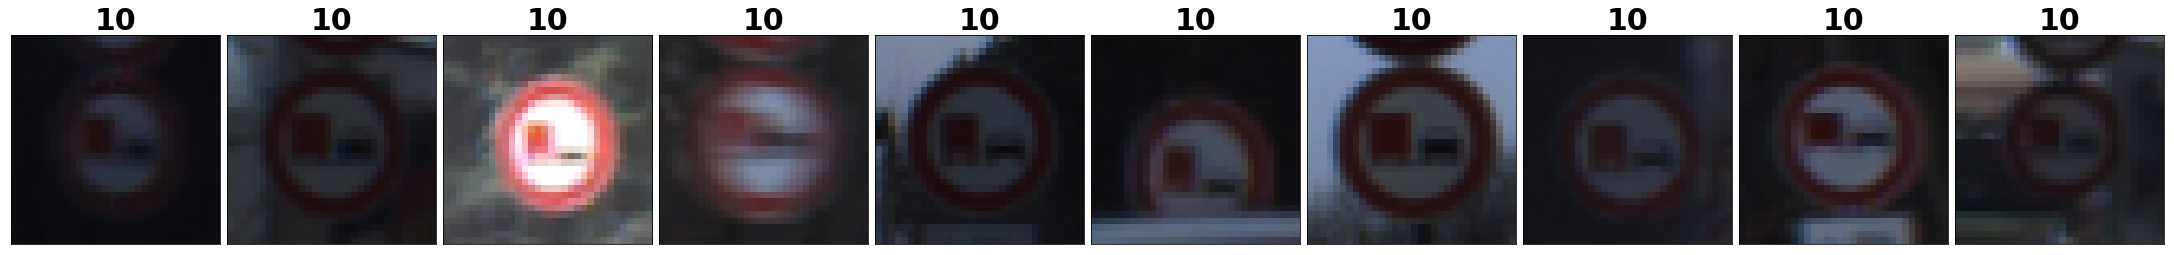

In [4]:
show_one_class_images(X_train,y_train,10)

####  Random show one image of all class from dataset.

Random show each class from data set:


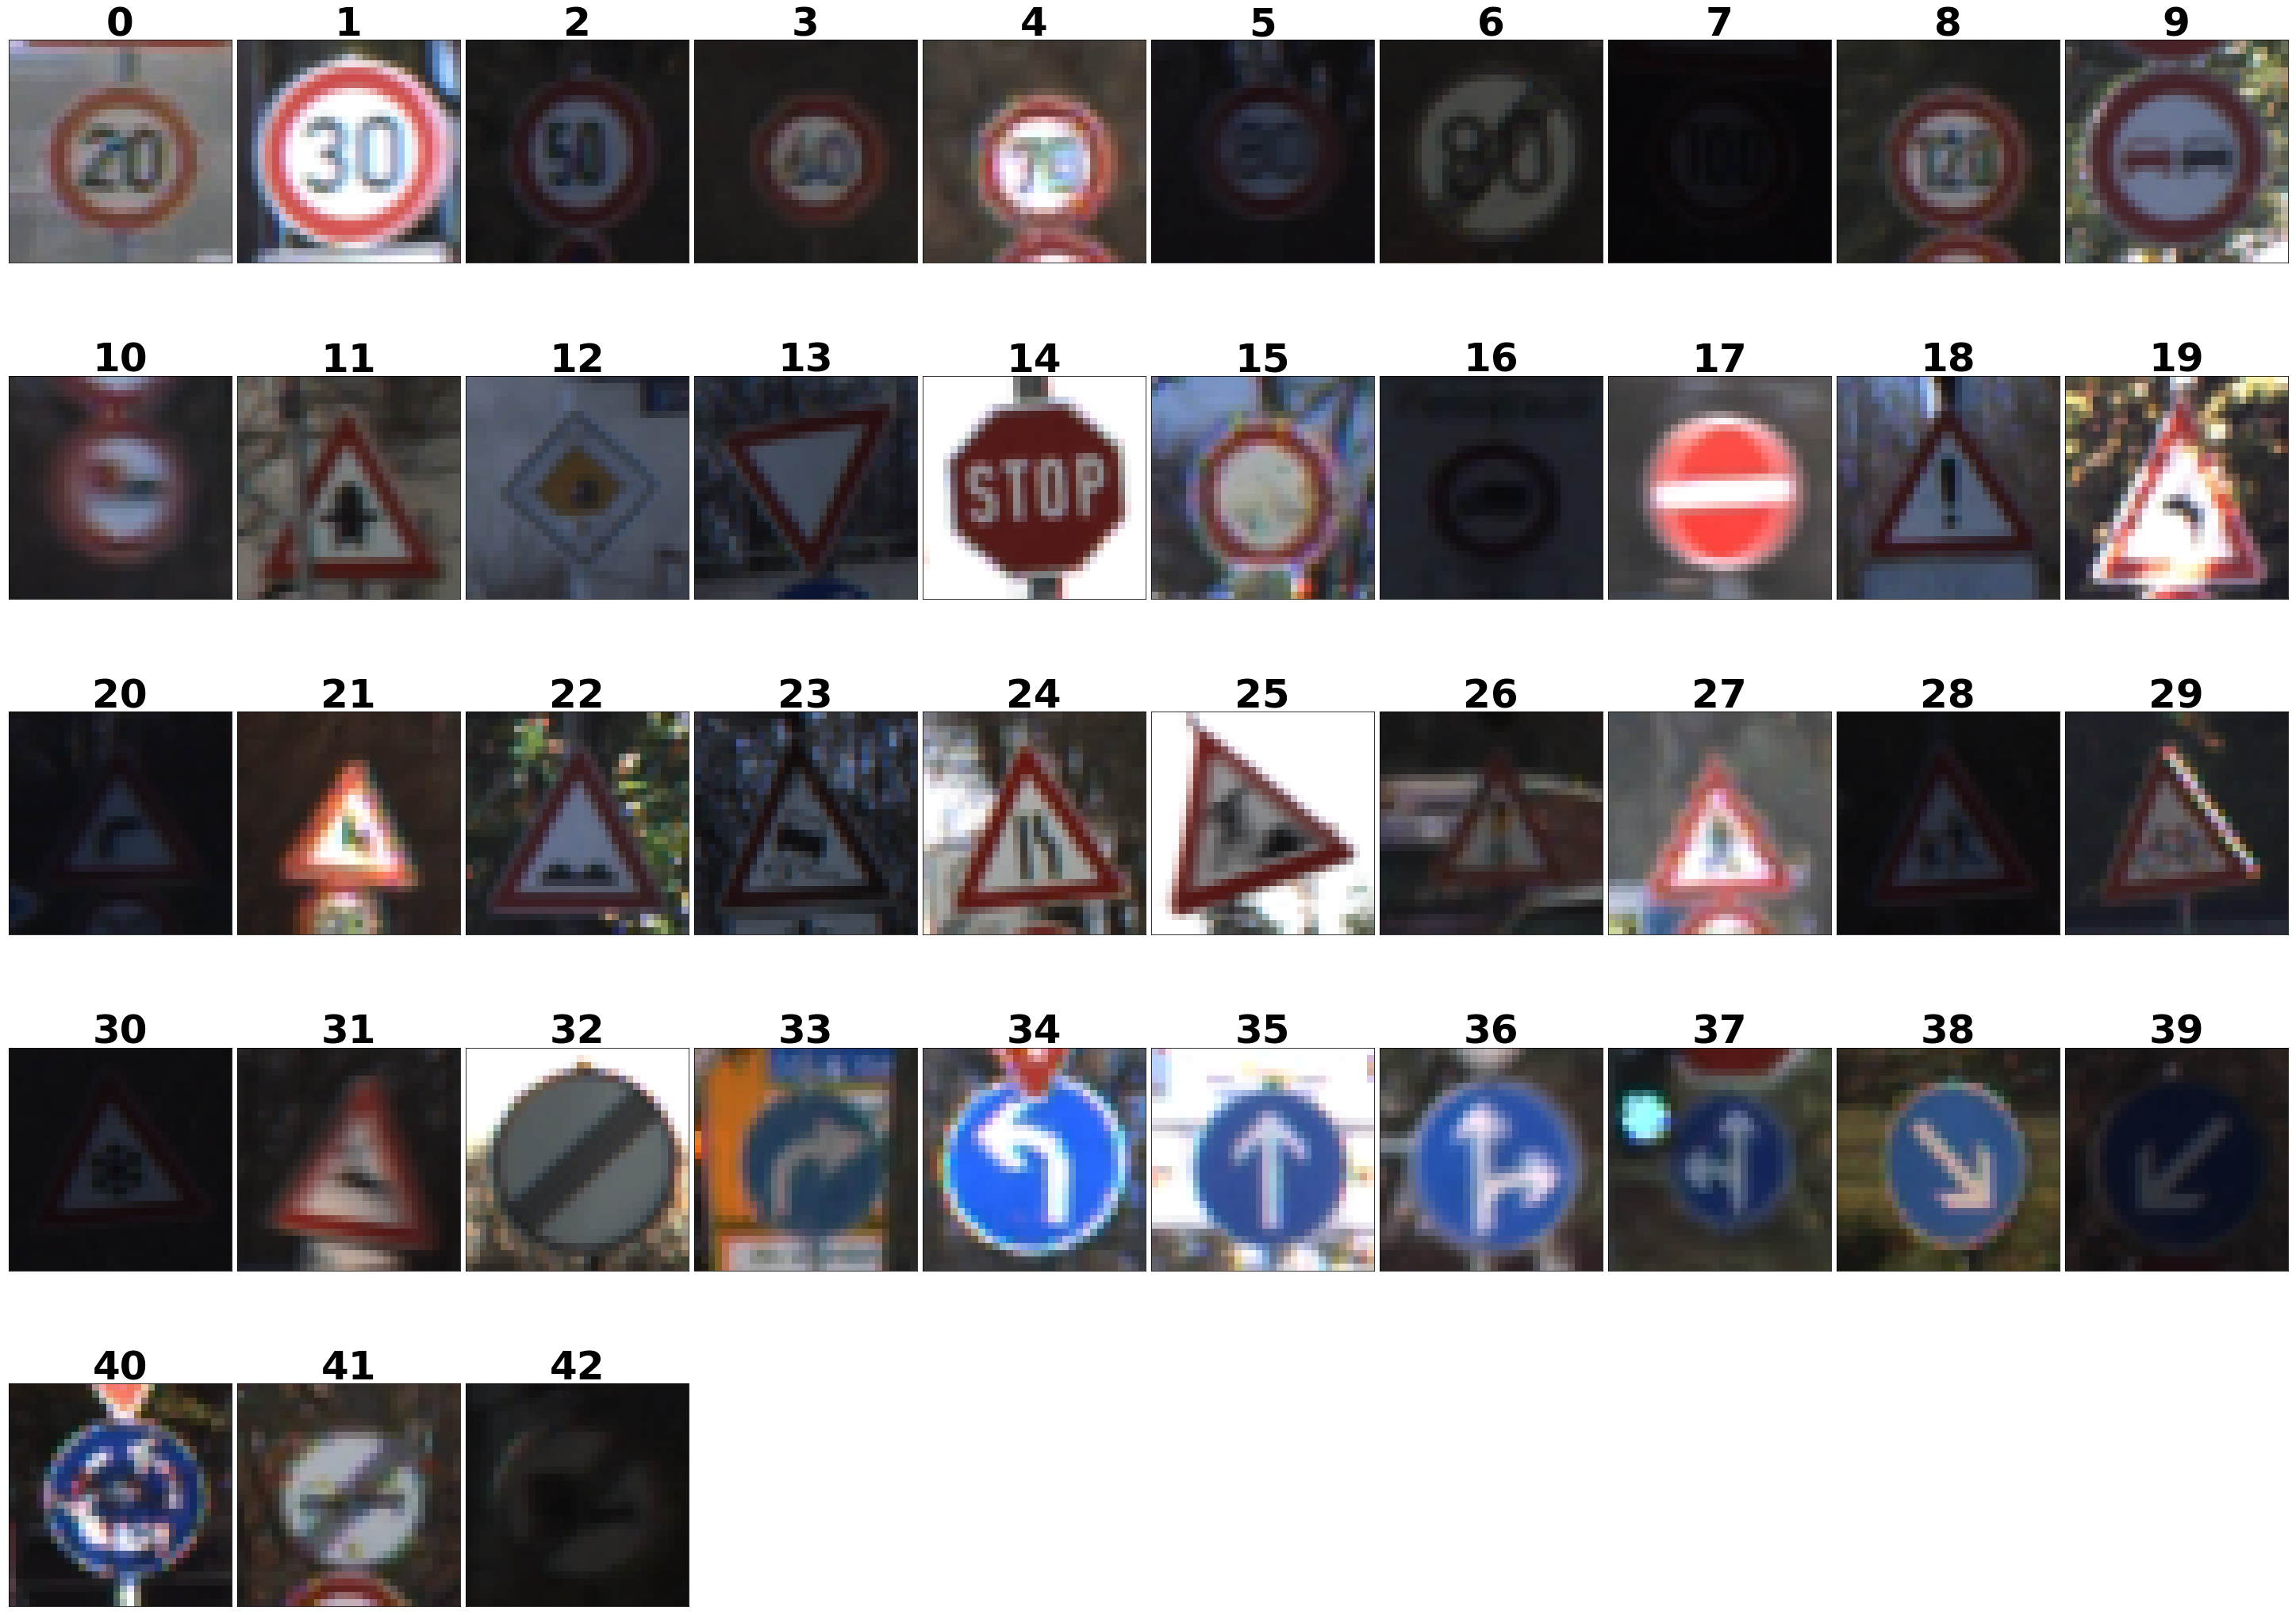

In [5]:
show_all_class_images(X_train,y_train)
# show_all_class_images(X_valid,y_valid)
# show_all_class_images(X_test,y_test)

#### Show all class by class from dataset.

Show Class=[0],Name=[Speed limit (20km/h)] from data set,Show length is [10],Total length is [180]


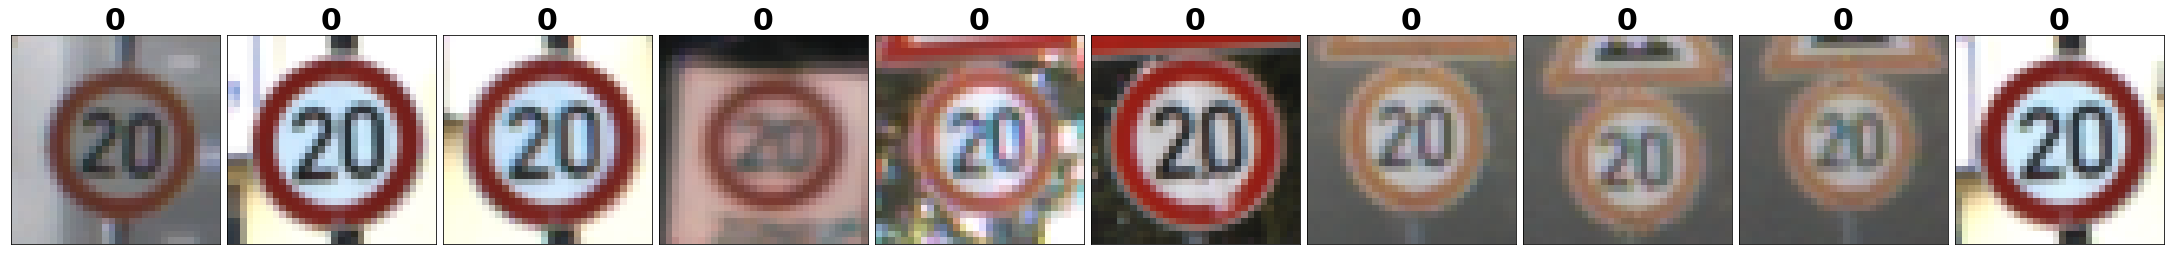

Show Class=[1],Name=[Speed limit (30km/h)] from data set,Show length is [10],Total length is [1980]


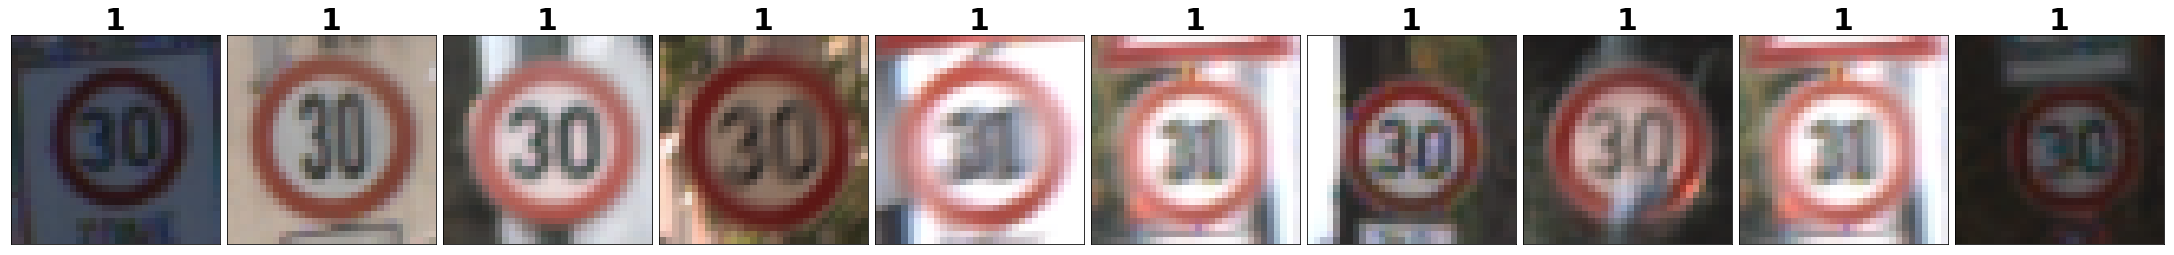

Show Class=[2],Name=[Speed limit (50km/h)] from data set,Show length is [10],Total length is [2010]


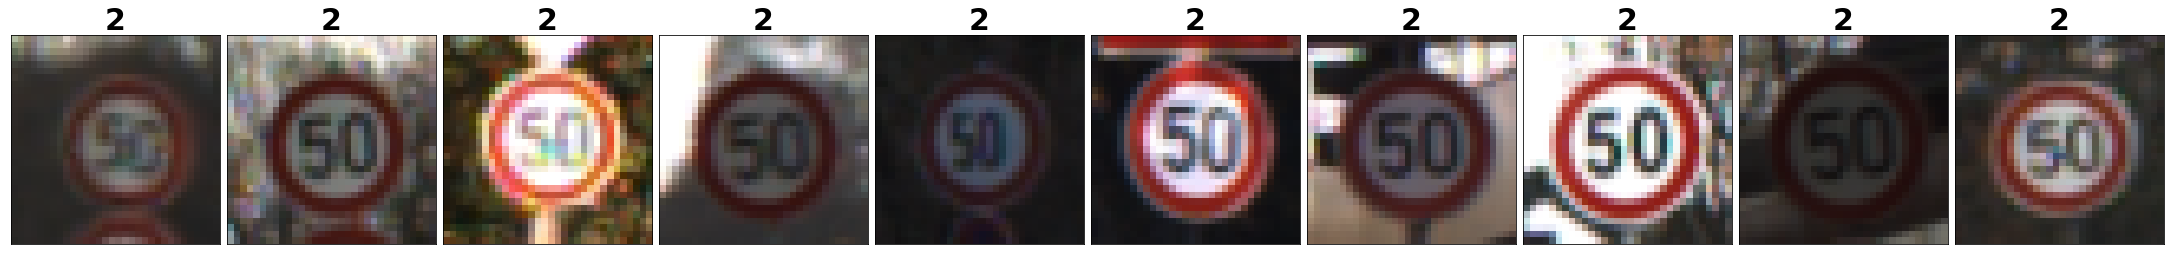

Show Class=[3],Name=[Speed limit (60km/h)] from data set,Show length is [10],Total length is [1260]


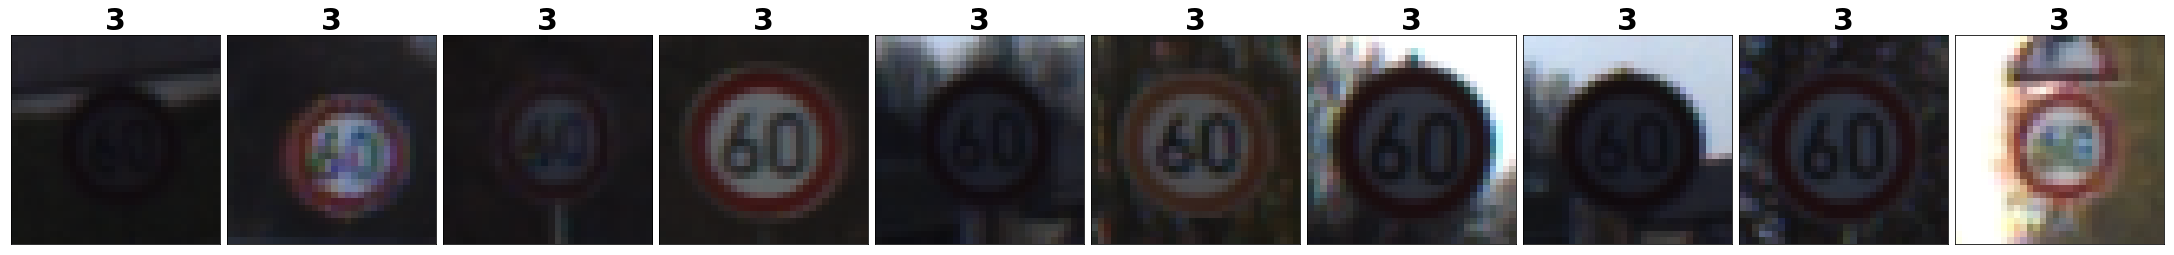

Show Class=[4],Name=[Speed limit (70km/h)] from data set,Show length is [10],Total length is [1770]


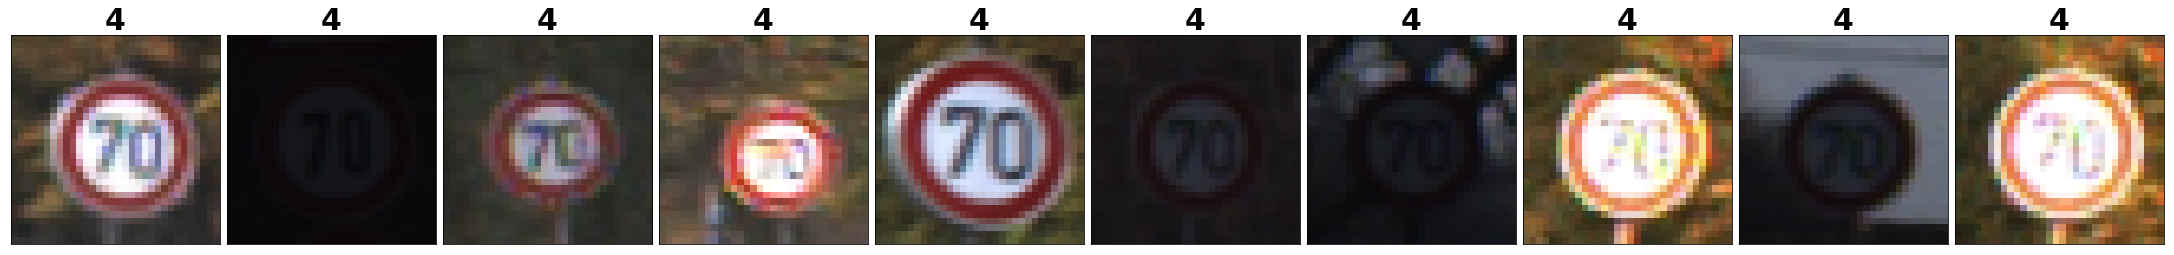

Show Class=[5],Name=[Speed limit (80km/h)] from data set,Show length is [10],Total length is [1650]


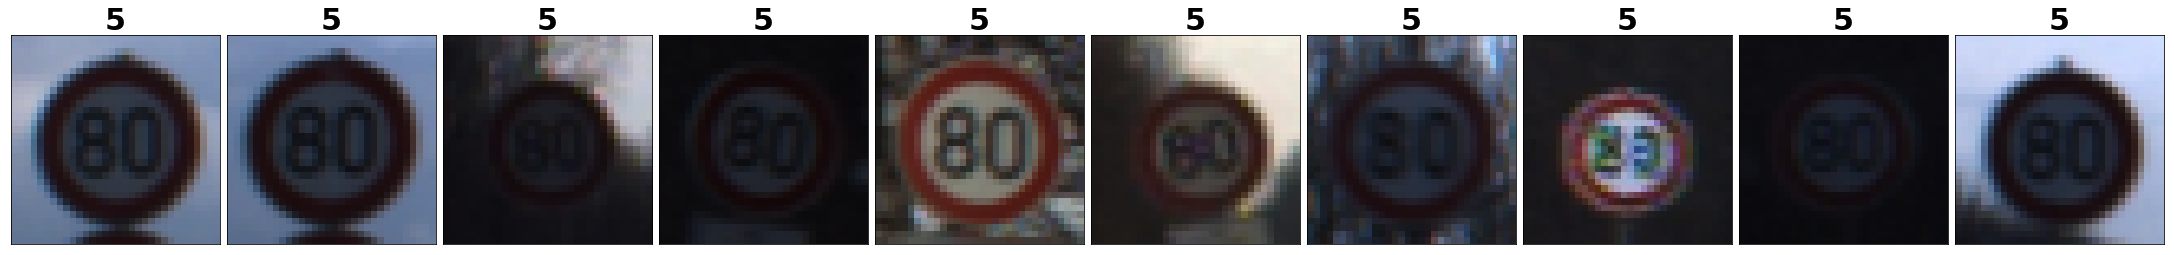

Show Class=[6],Name=[End of speed limit (80km/h)] from data set,Show length is [10],Total length is [360]


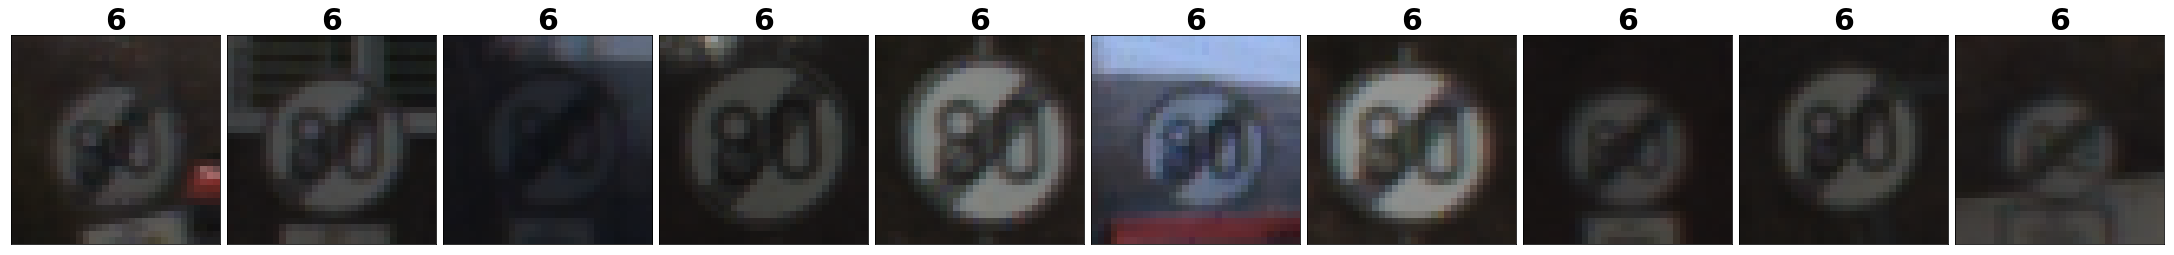

Show Class=[7],Name=[Speed limit (100km/h)] from data set,Show length is [10],Total length is [1290]


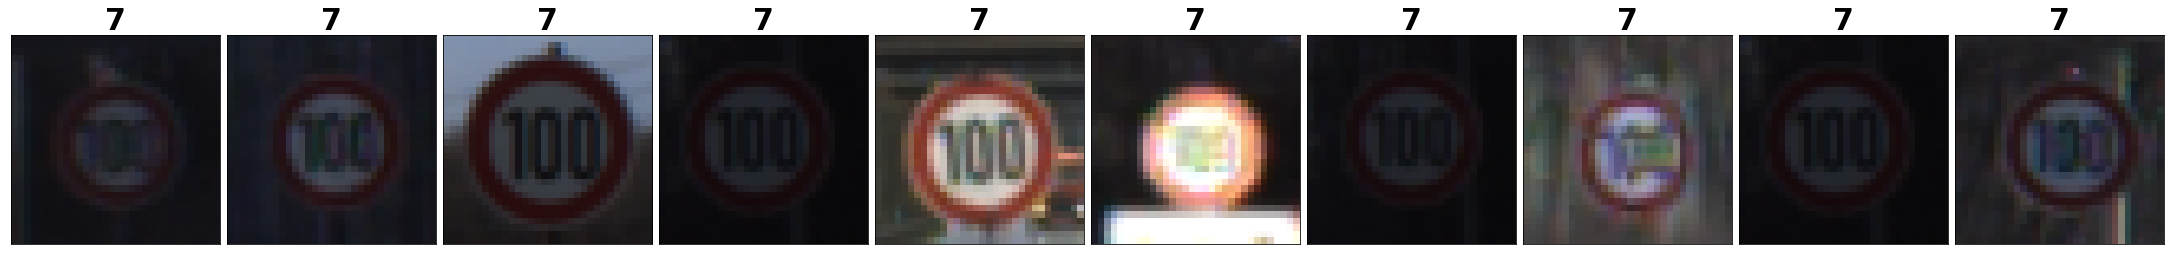

Show Class=[8],Name=[Speed limit (120km/h)] from data set,Show length is [10],Total length is [1260]


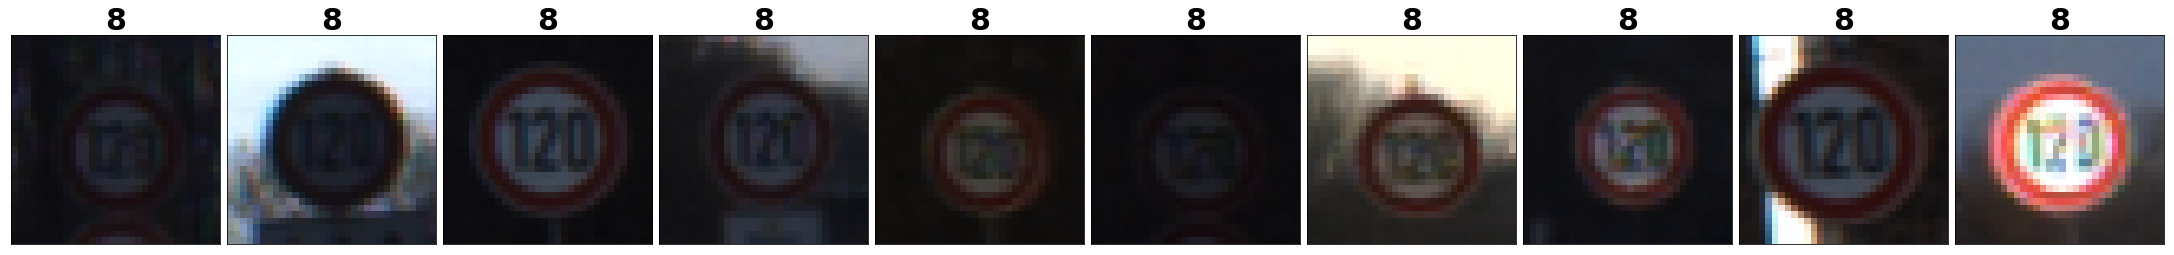

Show Class=[9],Name=[No passing] from data set,Show length is [10],Total length is [1320]


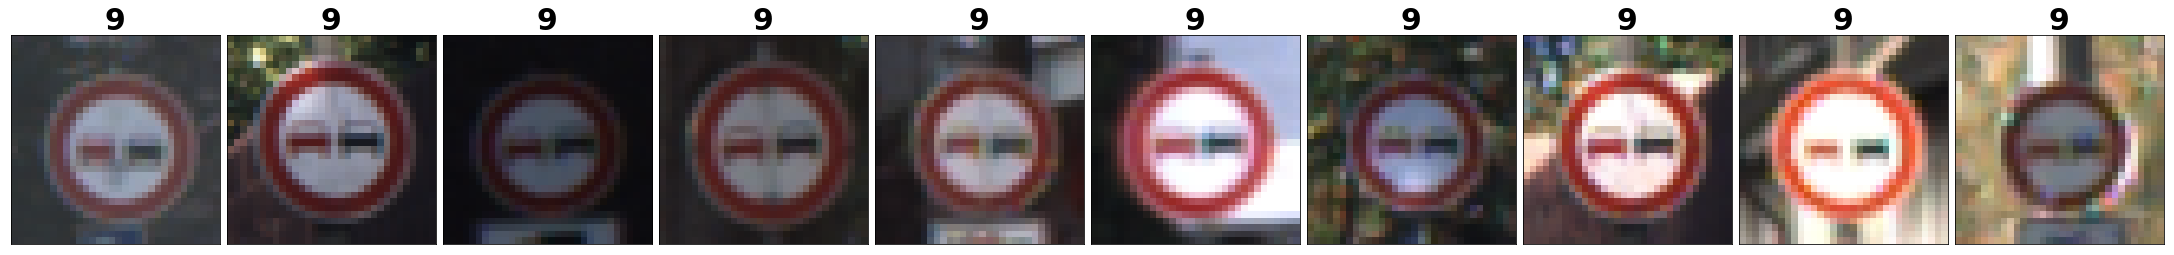

Show Class=[10],Name=[No passing for vehicles over 3.5 metric tons] from data set,Show length is [10],Total length is [1800]


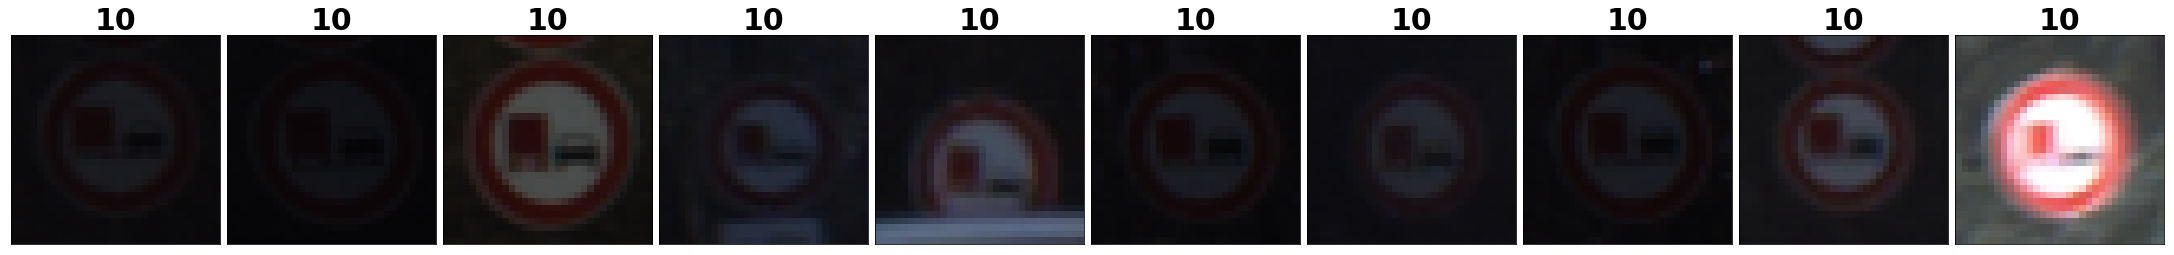

Show Class=[11],Name=[Right-of-way at the next intersection] from data set,Show length is [10],Total length is [1170]


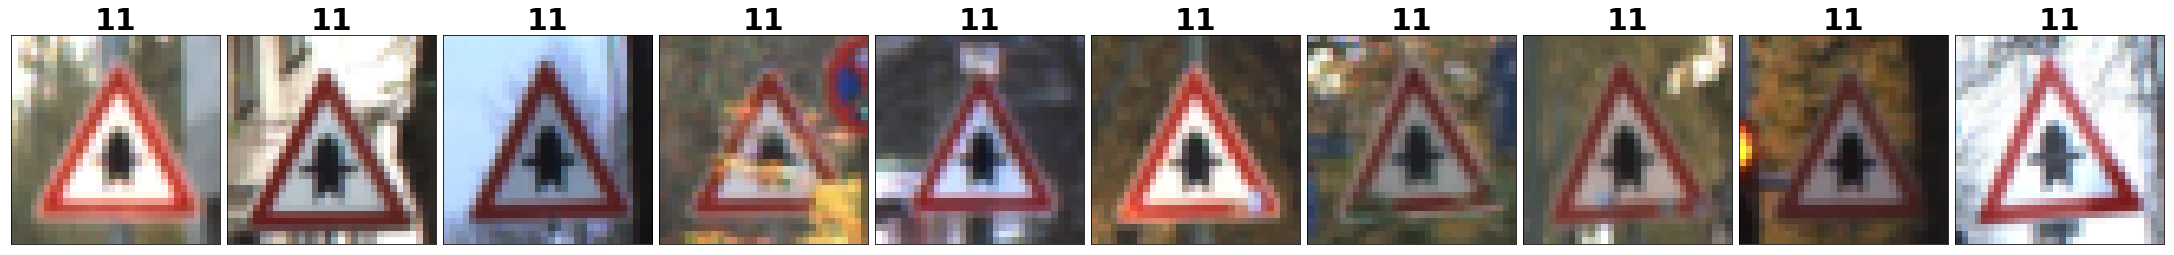

Show Class=[12],Name=[Priority road] from data set,Show length is [10],Total length is [1890]


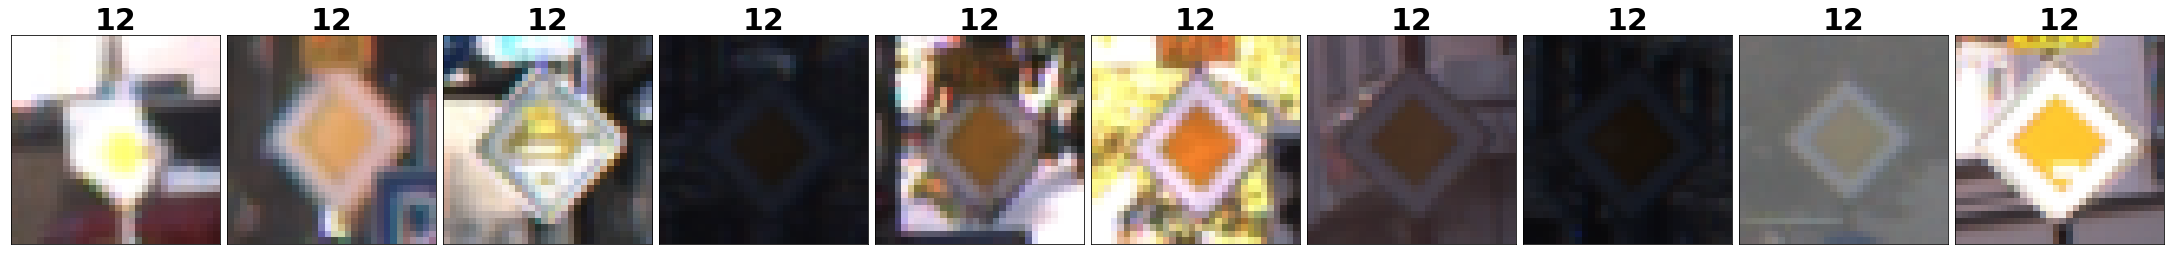

Show Class=[13],Name=[Yield] from data set,Show length is [10],Total length is [1920]


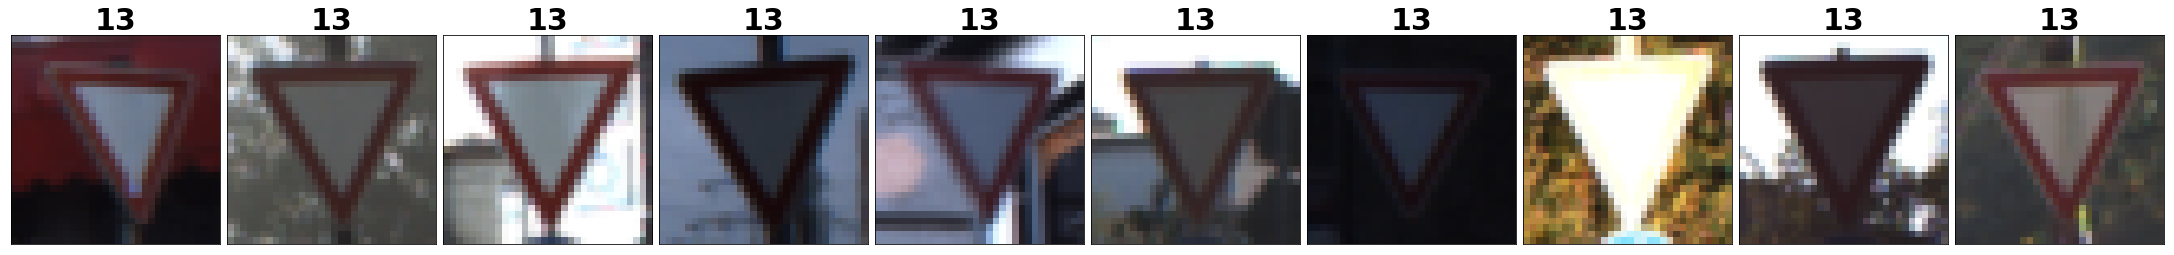

Show Class=[14],Name=[Stop] from data set,Show length is [10],Total length is [690]


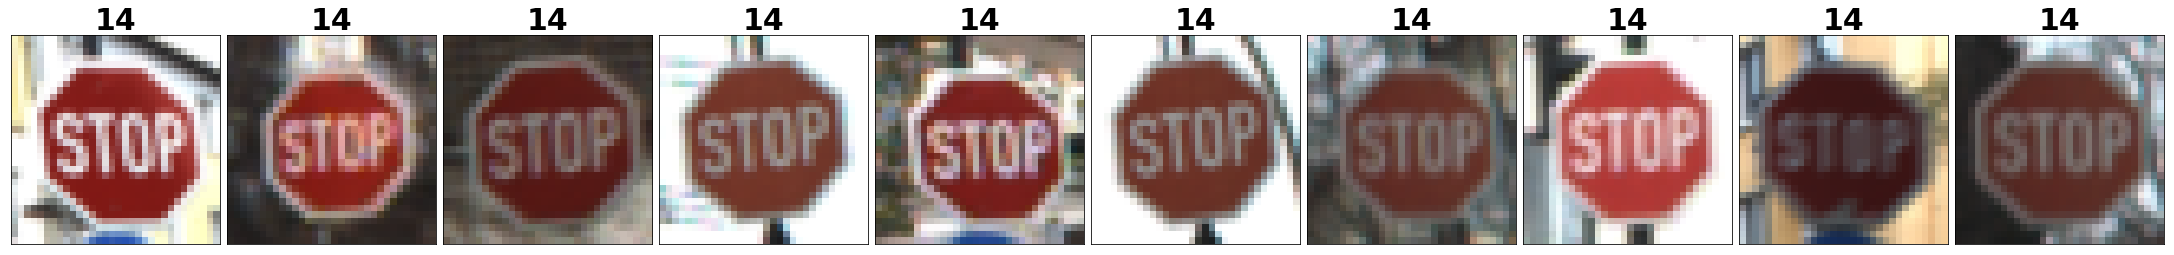

Show Class=[15],Name=[No vehicles] from data set,Show length is [10],Total length is [540]


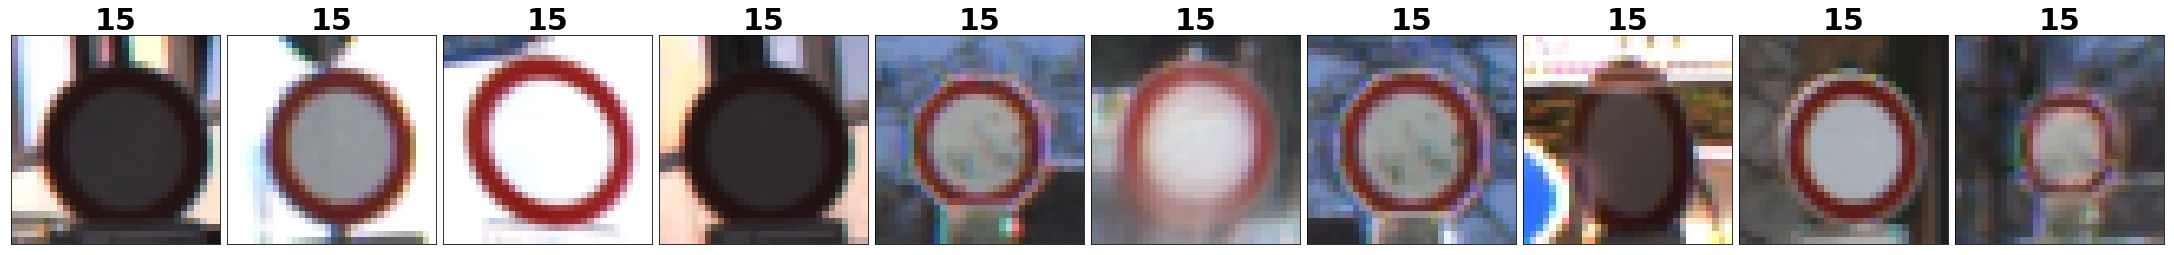

Show Class=[16],Name=[Vehicles over 3.5 metric tons prohibited] from data set,Show length is [10],Total length is [360]


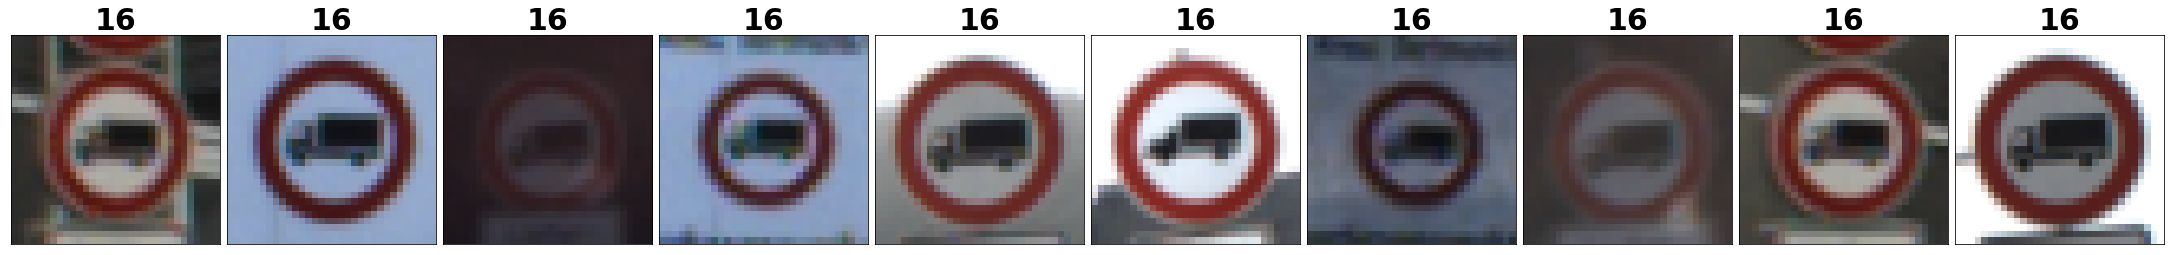

Show Class=[17],Name=[No entry] from data set,Show length is [10],Total length is [990]


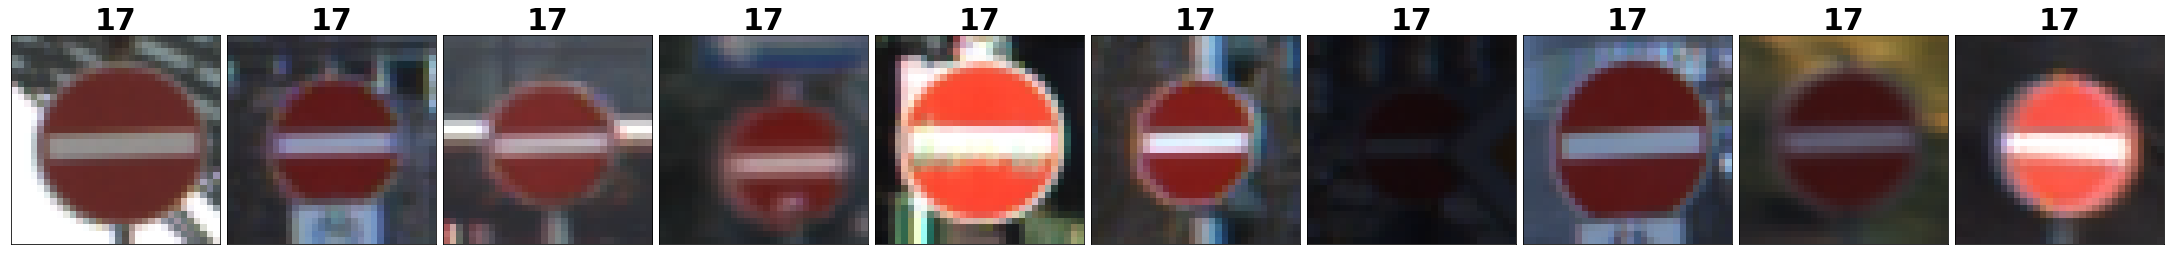

Show Class=[18],Name=[General caution] from data set,Show length is [10],Total length is [1080]


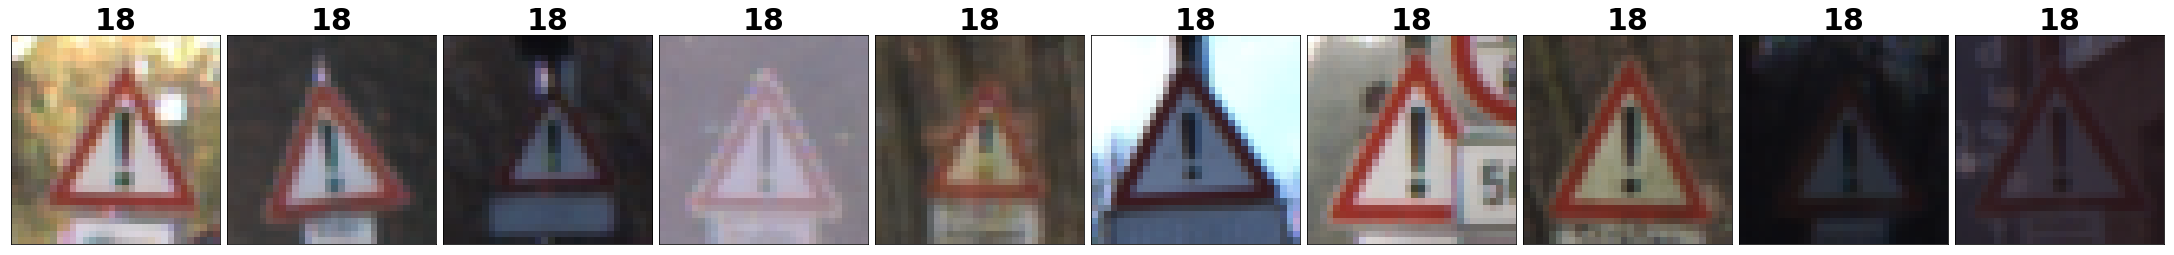

Show Class=[19],Name=[Dangerous curve to the left] from data set,Show length is [10],Total length is [180]


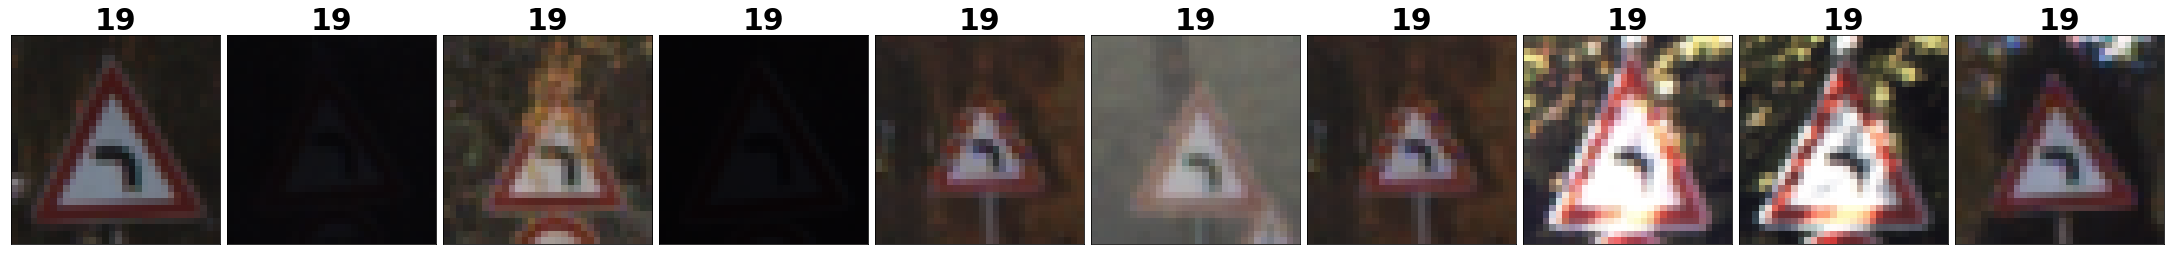

Show Class=[20],Name=[Dangerous curve to the right] from data set,Show length is [10],Total length is [300]


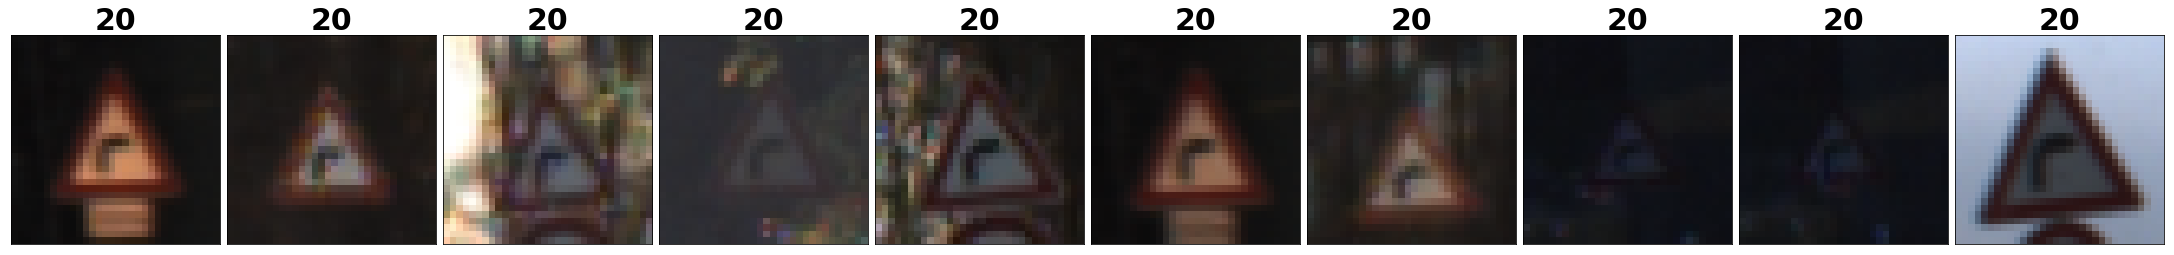

Show Class=[21],Name=[Double curve] from data set,Show length is [10],Total length is [270]


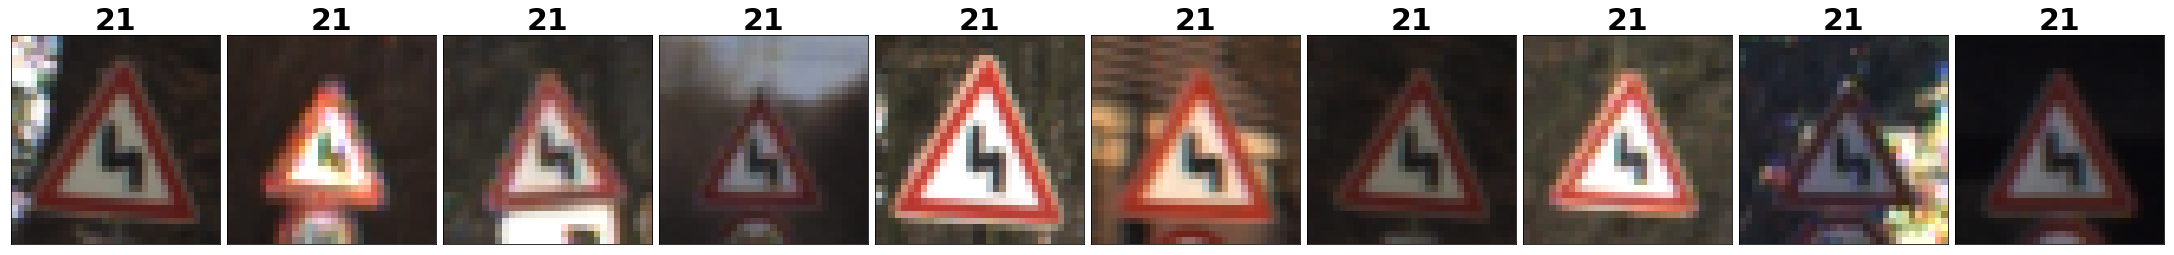

Show Class=[22],Name=[Bumpy road] from data set,Show length is [10],Total length is [330]


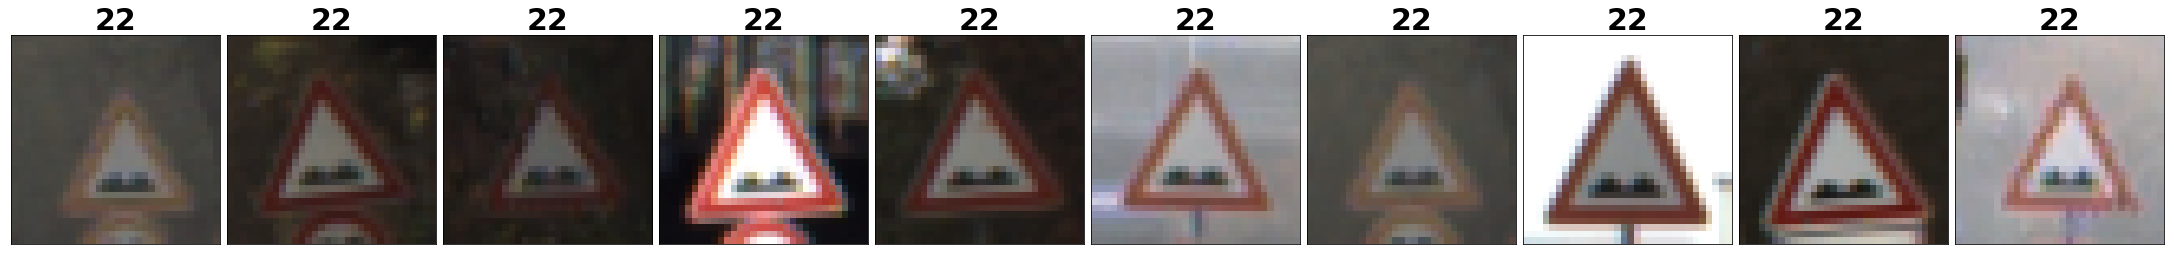

Show Class=[23],Name=[Slippery road] from data set,Show length is [10],Total length is [450]


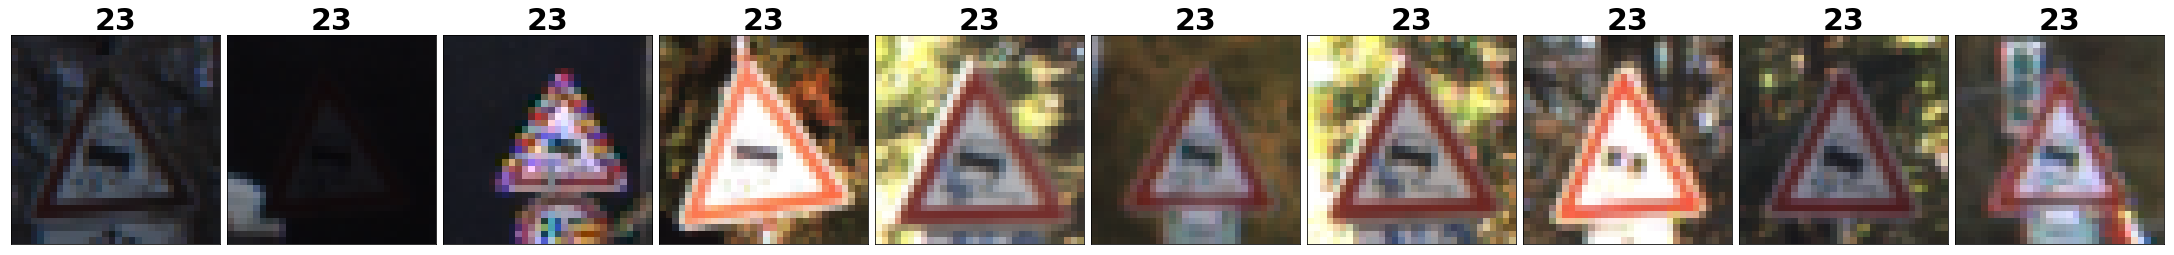

Show Class=[24],Name=[Road narrows on the right] from data set,Show length is [10],Total length is [240]


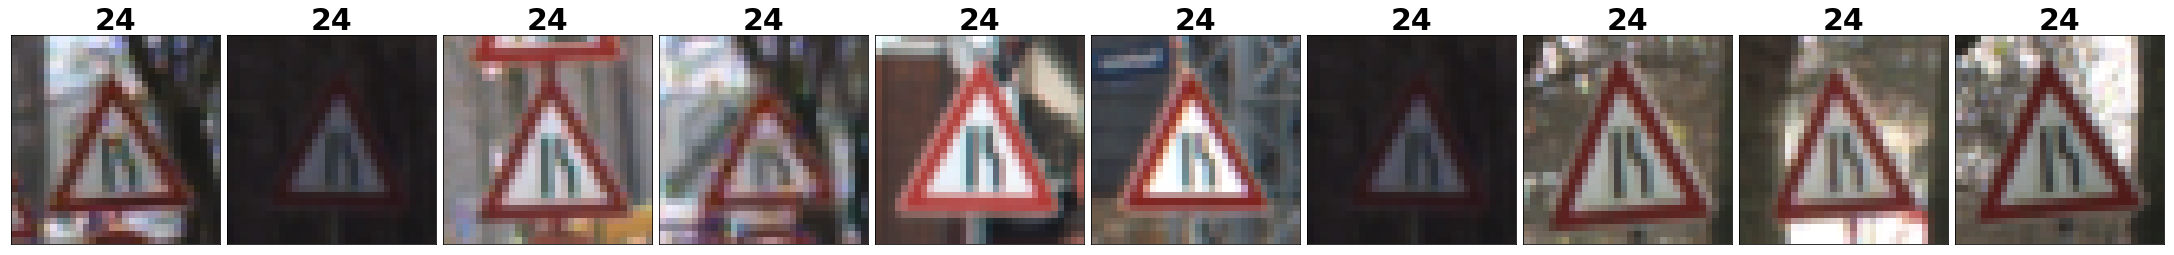

Show Class=[25],Name=[Road work] from data set,Show length is [10],Total length is [1350]


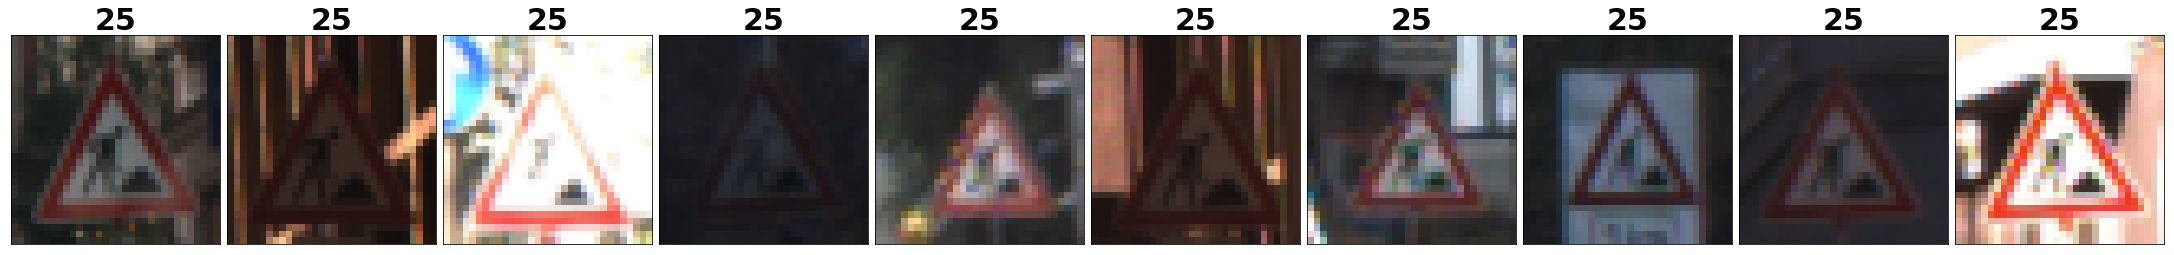

Show Class=[26],Name=[Traffic signals] from data set,Show length is [10],Total length is [540]


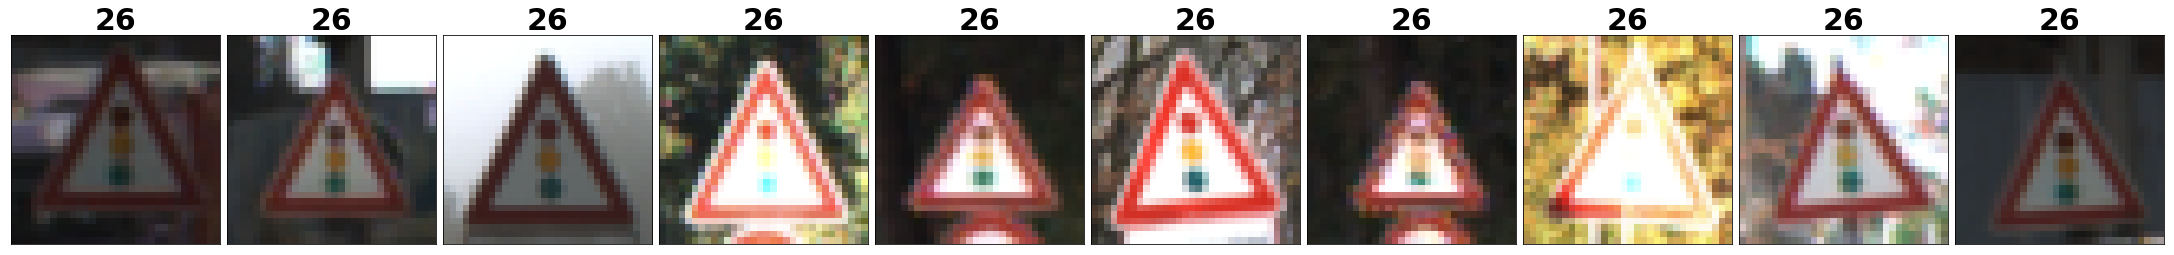

Show Class=[27],Name=[Pedestrians] from data set,Show length is [10],Total length is [210]


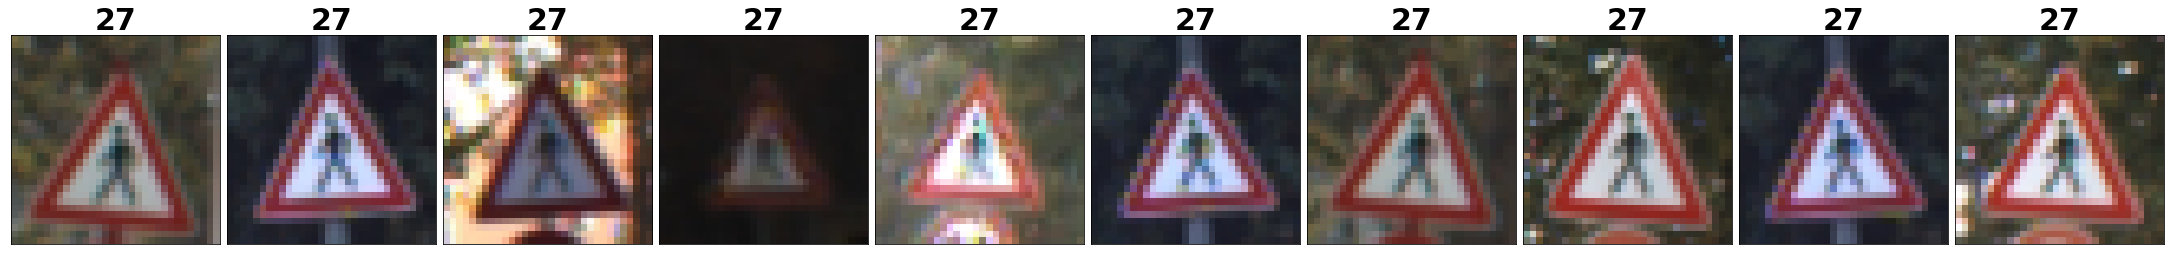

Show Class=[28],Name=[Children crossing] from data set,Show length is [10],Total length is [480]


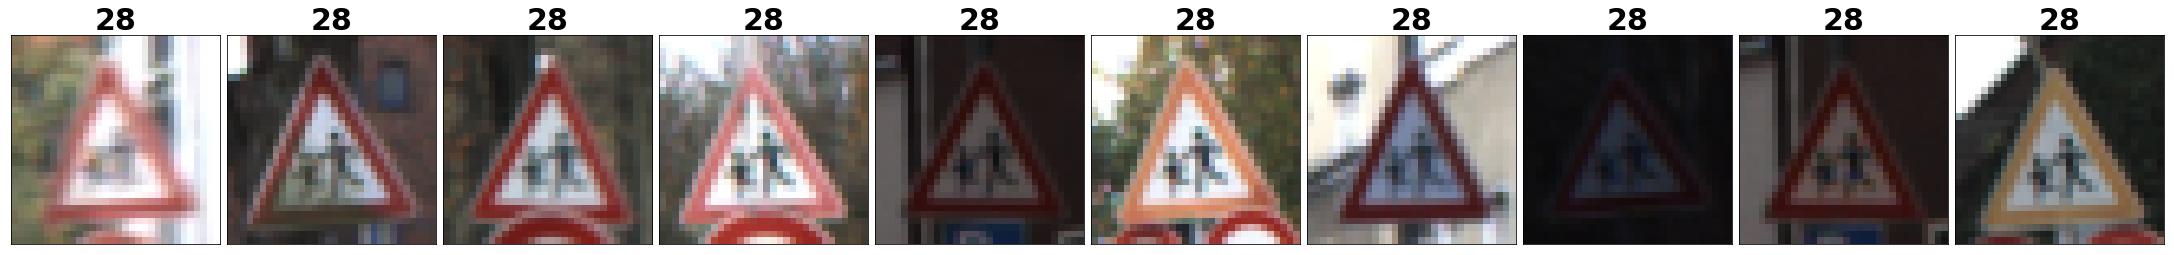

Show Class=[29],Name=[Bicycles crossing] from data set,Show length is [10],Total length is [240]


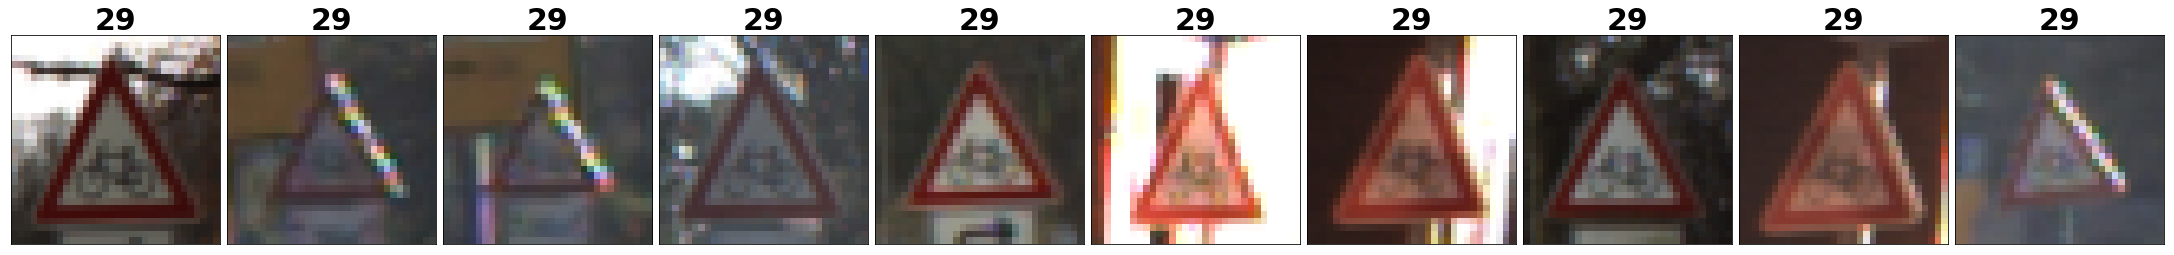

Show Class=[30],Name=[Beware of ice/snow] from data set,Show length is [10],Total length is [390]


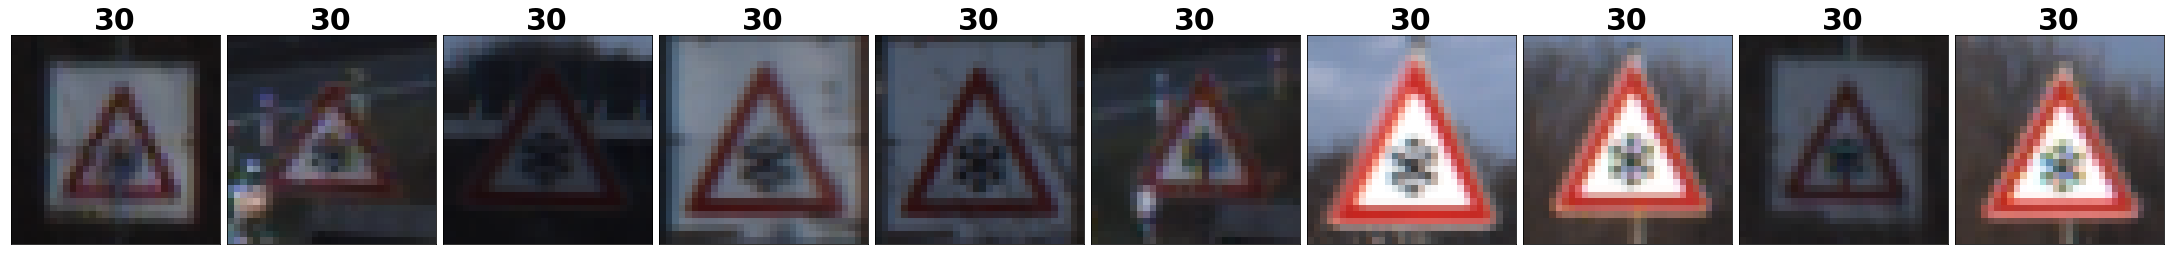

Show Class=[31],Name=[Wild animals crossing] from data set,Show length is [10],Total length is [690]


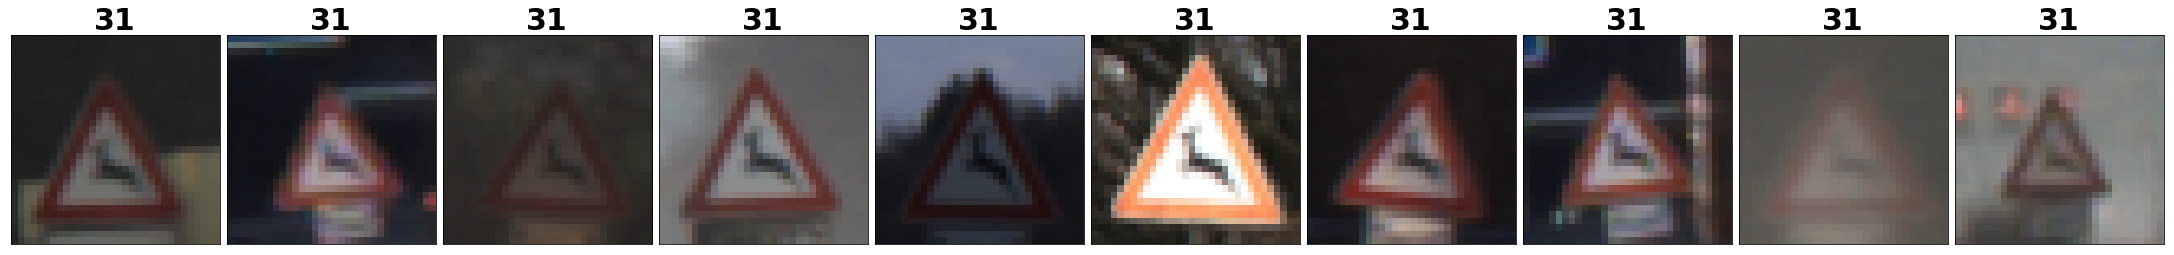

Show Class=[32],Name=[End of all speed and passing limits] from data set,Show length is [10],Total length is [210]


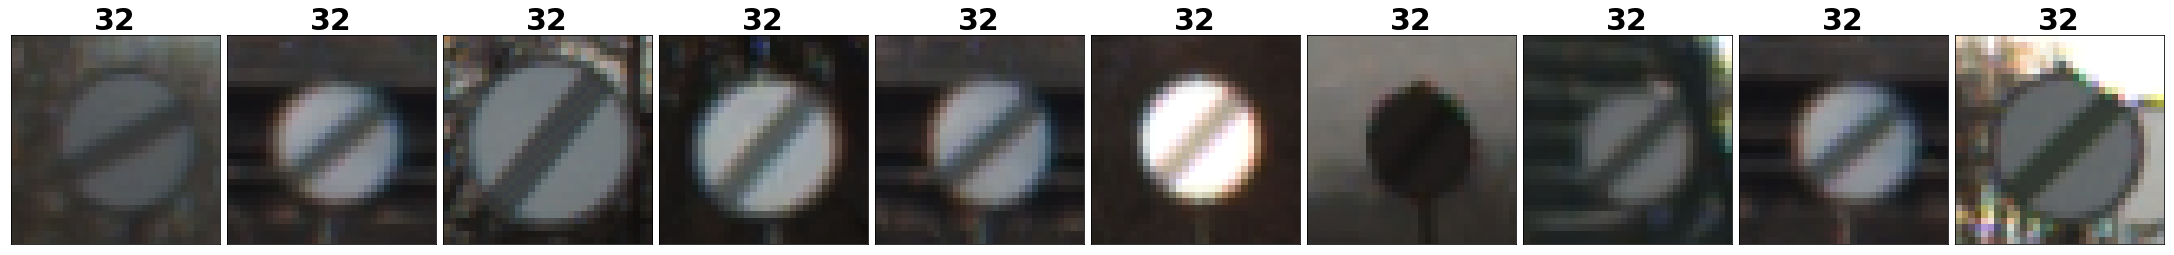

Show Class=[33],Name=[Turn right ahead] from data set,Show length is [10],Total length is [599]


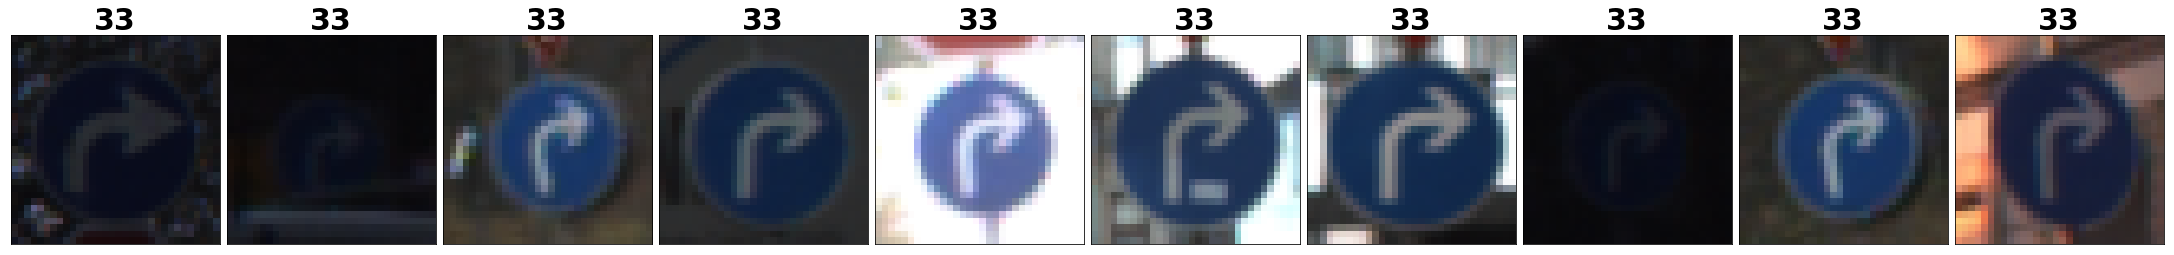

Show Class=[34],Name=[Turn left ahead] from data set,Show length is [10],Total length is [360]


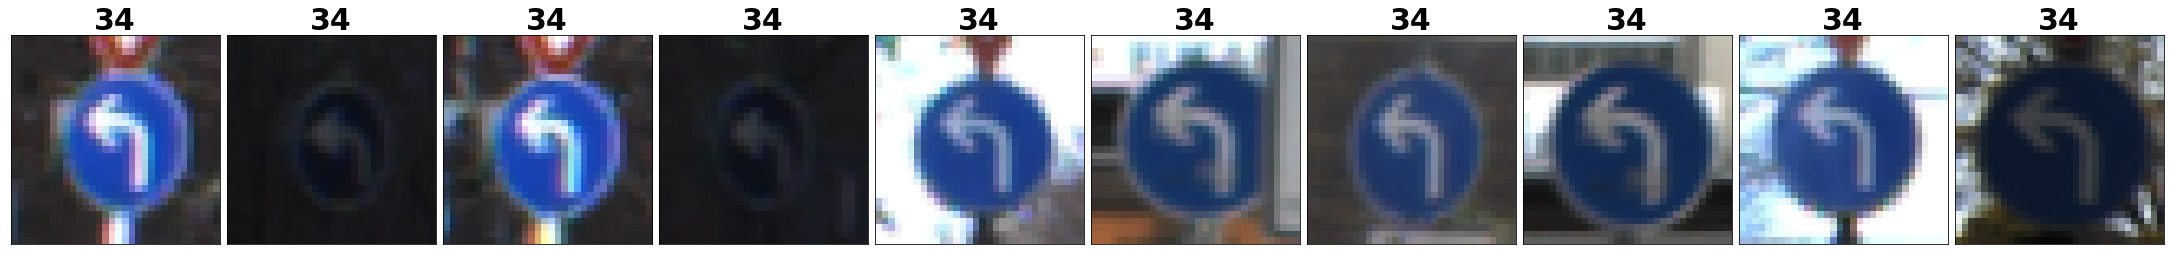

Show Class=[35],Name=[Ahead only] from data set,Show length is [10],Total length is [1080]


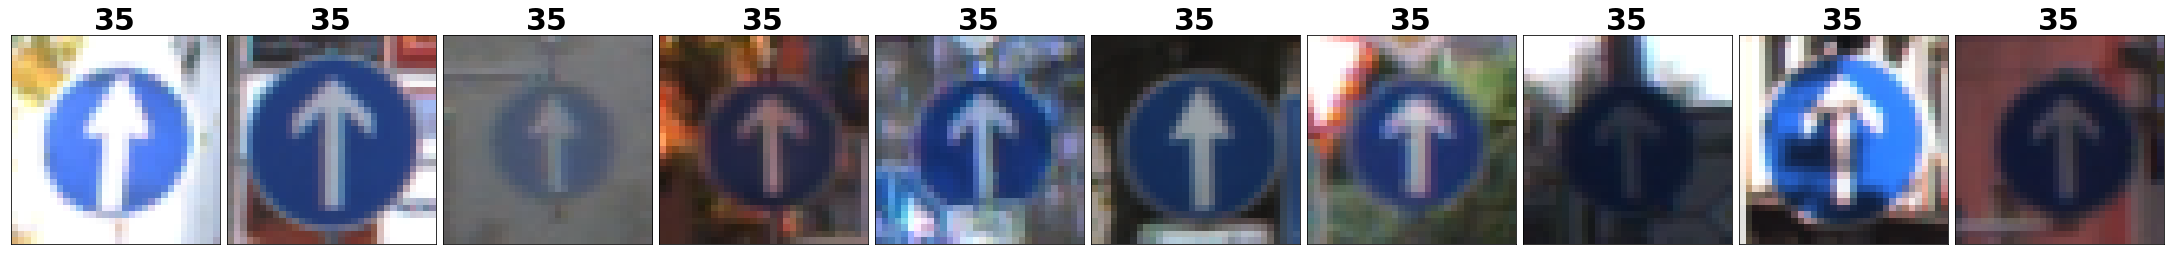

Show Class=[36],Name=[Go straight or right] from data set,Show length is [10],Total length is [330]


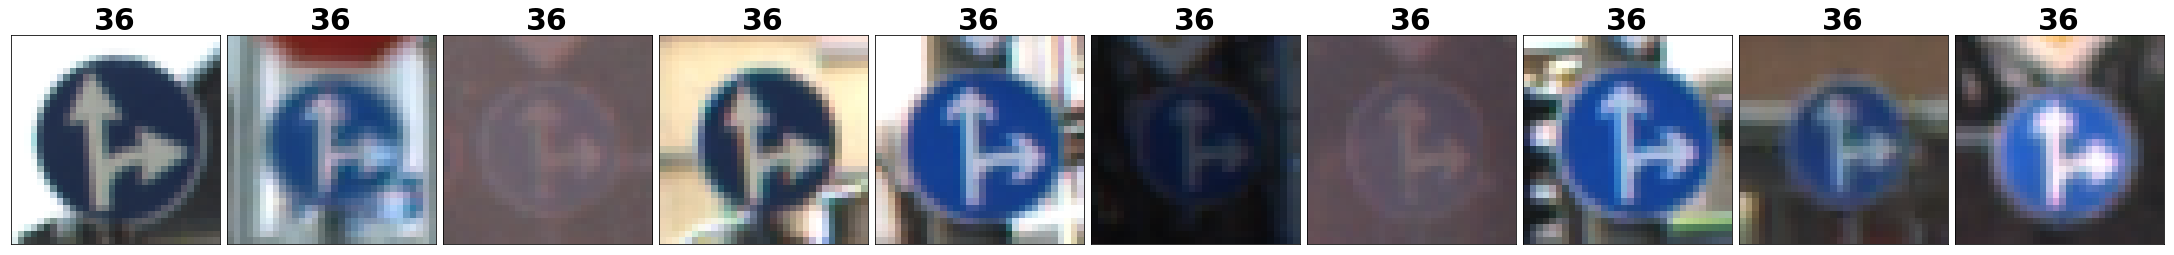

Show Class=[37],Name=[Go straight or left] from data set,Show length is [10],Total length is [180]


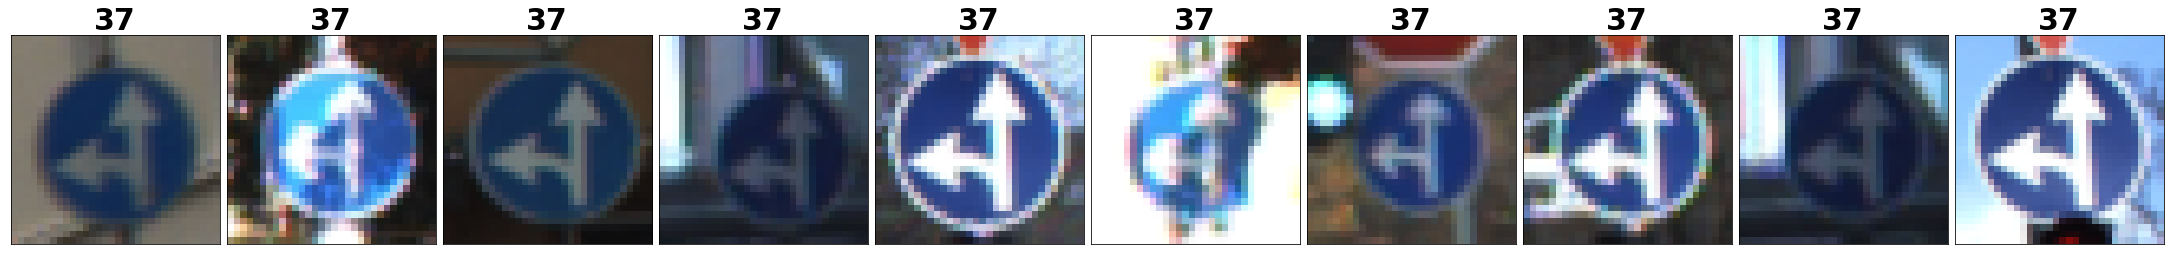

Show Class=[38],Name=[Keep right] from data set,Show length is [10],Total length is [1860]


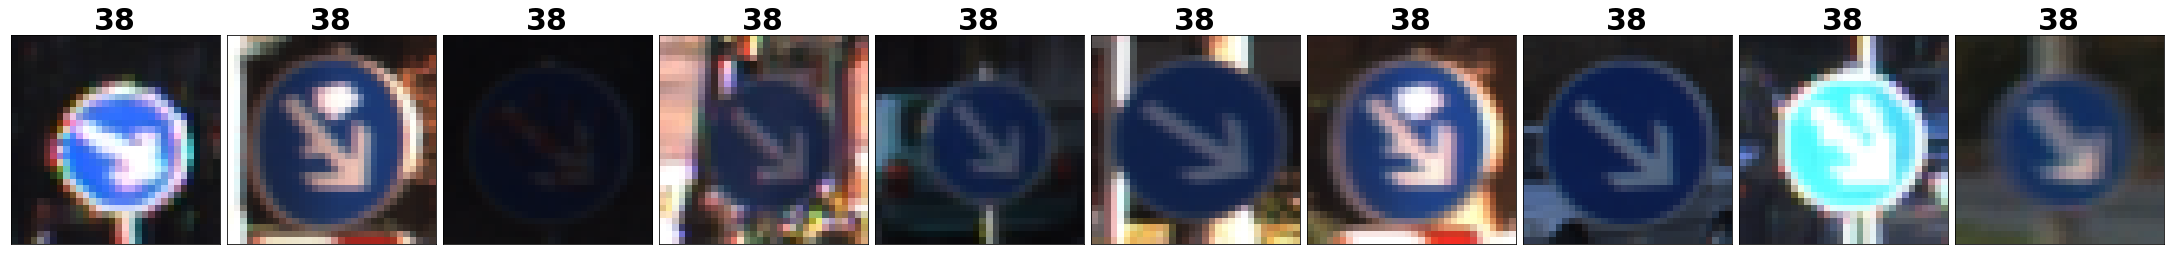

Show Class=[39],Name=[Keep left] from data set,Show length is [10],Total length is [270]


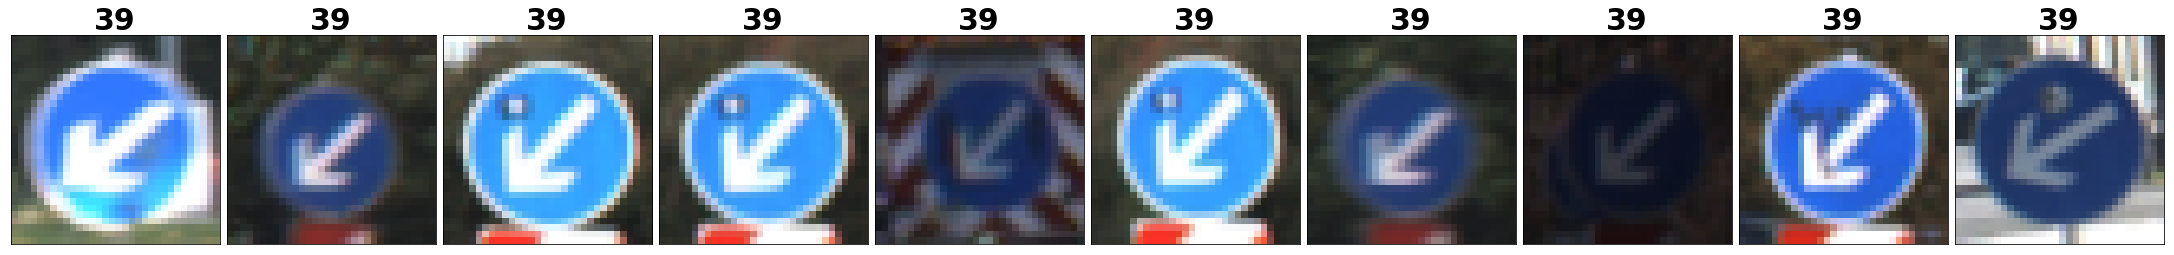

Show Class=[40],Name=[Roundabout mandatory] from data set,Show length is [10],Total length is [300]


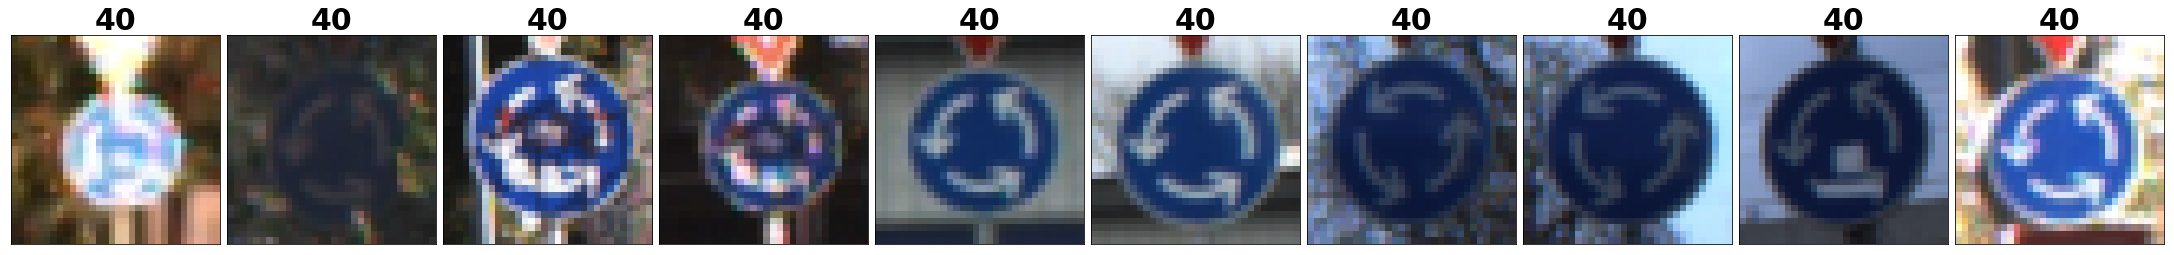

Show Class=[41],Name=[End of no passing] from data set,Show length is [10],Total length is [210]


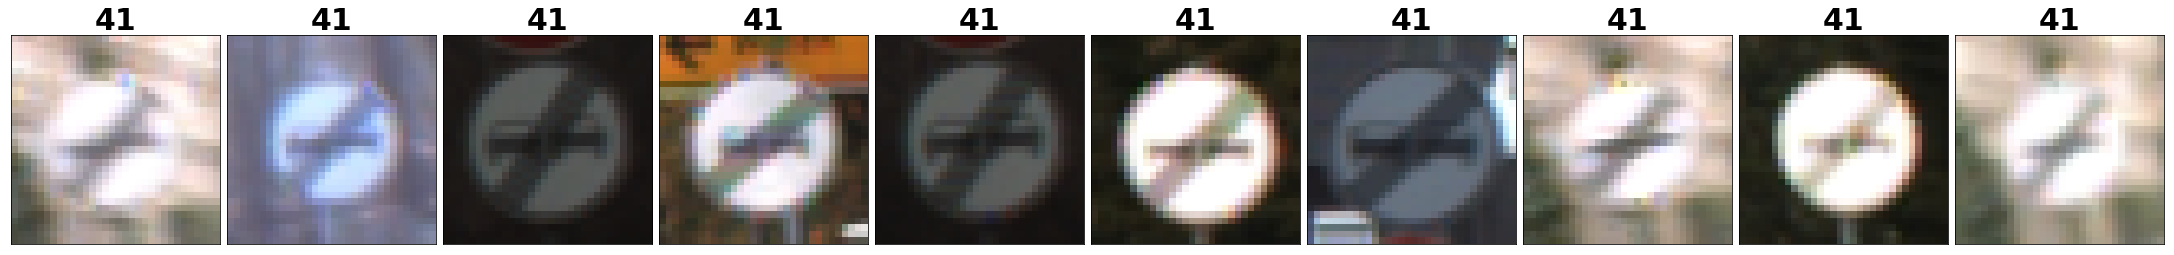

Show Class=[42],Name=[End of no passing by vehicles over 3.5 metric tons] from data set,Show length is [10],Total length is [210]


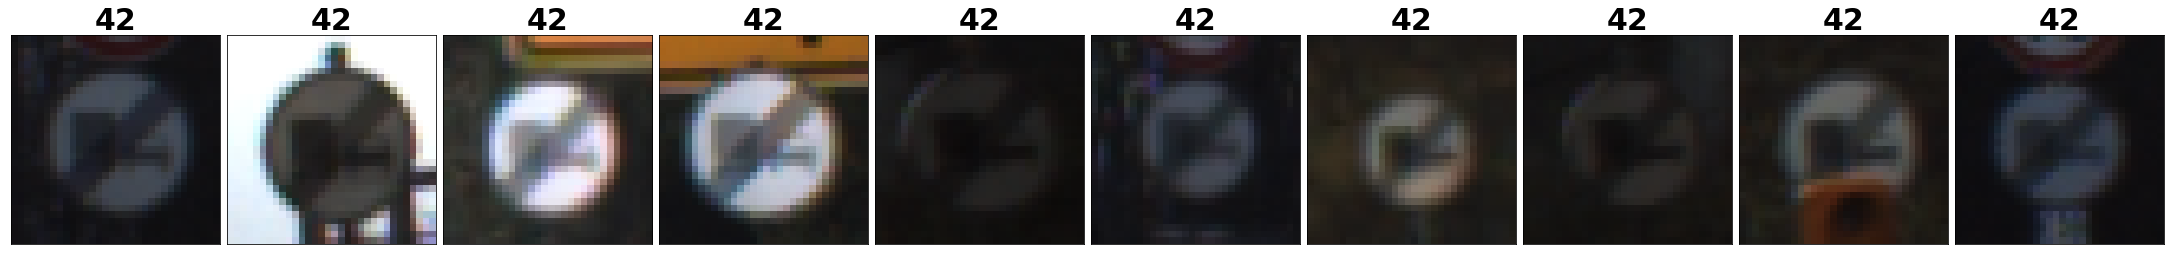

In [6]:
show_class_by_class_images(X_train,y_train)

#### Histogram visualization of the dataset

In [7]:
# histogram of label frequency
# show each class
def show_single_class_histogram(trainlabel, sumclass=n_classes):
    """"
    show single images histogram
    
    Arguments:
        images: source images
        lables: source corresponding label
    """
    hist_train, bins_train = np.histogram(trainlabel, bins=sumclass)
    width = 0.8 * (bins_train[1] - bins_train[0])
    #adjust center location 1.96
    center = (bins_train[:-1] + bins_train[1:]) / 1.96
    plt.figure(figsize=(15,5)) 
    l1 = plt.bar(center-width/2, hist_train, align='center', width=width)
    plt.xticks(np.arange(0, sumclass, 1) )
    plt.xlabel('Classes')  
    plt.ylabel('Count of each class') 
    plt.show()
    
def show_all_class_histogram(trainlabel, testlabel, sumclass=n_classes):
    """"
    Show all class histogram
    
    Arguments:
        images: source images
        lables: source corresponding label
    """
    hist_train, bins_train = np.histogram(trainlabel, bins=sumclass)
    hist_test, bins_test = np.histogram(testlabel, bins=sumclass)
    width = 0.5 * (bins_train[1] - bins_train[0])
    #adjust center location 1.96
    center = (bins_train[:-1] + bins_train[1:]) / 1.96
    plt.figure(figsize=(15,5)) 
    l1 = plt.bar(center-width, hist_train, align='center', width=width)
    l2 = plt.bar(center, hist_test, align='center', width=width)
    plt.legend((l1, l2), ('train set', 'test set'))
    plt.xticks(np.arange(0, sumclass, 1) )
    plt.xlabel('Classes')  
    plt.ylabel('Count of each class') 
    plt.show()

Train dataset showing:


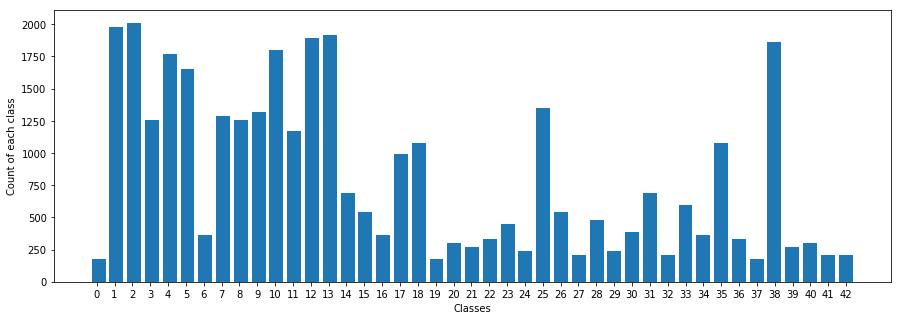

Valid dataset showing:


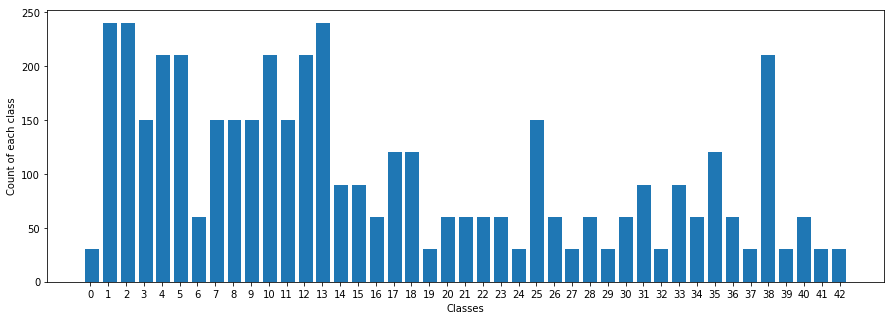

Test dataset showing:


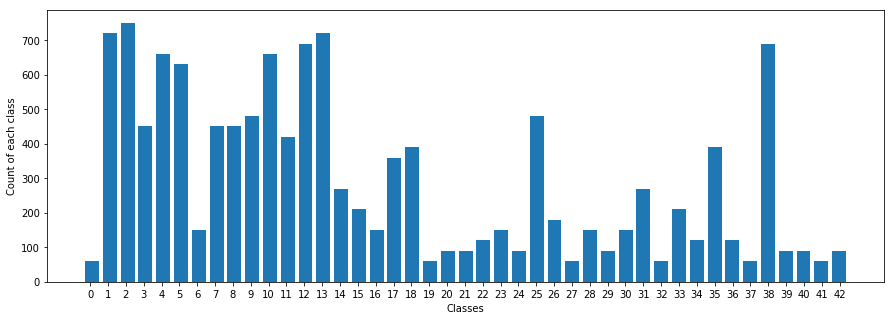

In [8]:
print("Train dataset showing:")
show_single_class_histogram(y_train)

print("Valid dataset showing:")
show_single_class_histogram(y_valid)

print("Test dataset showing:")
show_single_class_histogram(y_test)

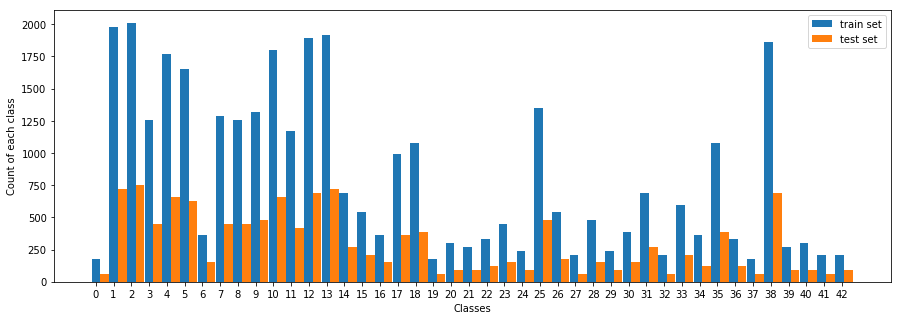

In [9]:
show_all_class_histogram(y_train,y_test,n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Generate fake data to balance image numbers of  per label

#### Image Data Generator function definition

In [32]:
import cv2
from skimage import io, color, exposure, transform
from skimage.util import random_noise


def gamma_correction(img, correction):
    """"
    Gamma correction function
    
    """
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

def gammaImage(img,gammarate= 0.2):
    """"
    Gamma correction function
    
    """
    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)   
    HSV[:,:,2] = gamma_correction((HSV[:,:,2]),(2*gammarate * np.random.random_sample(1) + 1-gammarate))
#     HSV[:,:,2] = gamma_correction((HSV[:,:,2]),(np.random.random_sample(1) + gammarate))
    img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )
    return img

def gaussian_blur(img, kernel_size=3):
    """"
    Gaussian blur function
    
    """
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def gaussian_noise(img):
    """"
    Gaussian noise function
    
    """
    var = 0.001*np.random.random_sample(1)
    return np.uint8(255*random_noise(img/255, mode="gaussian",var=var))

def randomerase(img, hlimt=12,wlimit=12):
    """"
    Gaussian erase function
    
    """
    imgshape = img.shape
    h = np.random.randint(0, hlimt)
    w = np.random.randint(0, wlimit)
    x1 = np.random.randint(0, imgshape[0] - h)
    y1 = np.random.randint(0, imgshape[1] - w)
    cropimg =np.copy(img)
    cropimg[x1:x1+h, y1:y1+w,0] = 127
    cropimg[x1:x1+h, y1:y1+w,1] = 127
    cropimg[x1:x1+h, y1:y1+w,2] = 127
    return cropimg

def DataAugumentProcess(img,gammarate = 0.2,blurrate = 0.2,randomeraserte=0.5):
    """"
    Data Augumention Process function
    
    """
    img = gammaImage(img,gammarate)
    if(np.random.random_sample(1) < blurrate):
        img = gaussian_blur(img)
    if(np.random.random_sample(1) < randomeraserte):
        img = randomerase(img)   
    
    img = gaussian_noise(img)
    
    return img

In [33]:
# creat the generator to perform online data augmentation
from keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(rotation_range=5.,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   preprocessing_function=DataAugumentProcess)

# take a random image from the training set
def gen_class_images_show(images,lables,class_n):
    """"
    Generate specified one class image for show testing
    
    """
    imagemarkimg = np.copy(X_train[y_train == class_n])
    labelmarkimg = y_train[y_train == class_n] 
    
    img_rgb = imagemarkimg[np.random.randint(len(labelmarkimg))].astype(np.uint8)
    # plot the original image
    plt.figure(figsize=(2,2))
    plt.imshow(img_rgb)
    plt.title('Source of RGB image (class = {})'.format(class_n))
    plt.axis('off')
    plt.show()
    
    x = np.empty((0,img_rgb.shape[0],img_rgb.shape[1],img_rgb.shape[2]))
    y = np.empty(0,dtype='uint8')
    
    print('Generating of RGB image (class = {})'.format(class_n))
    print()
    batch_size = 30
    for x_batch, y_batch in image_datagen.flow(imagemarkimg,labelmarkimg, batch_size=batch_size):
#         print(x.shape)
#         print(x_batch.shape)
        x = np.concatenate((x,x_batch),axis=0)
        y = np.concatenate((y,y_batch),axis=0)
#         print(x.shape)
        break
    
    show_one_class_images(x,y,class_n,batch_size)

#### Image Data Generator function show test

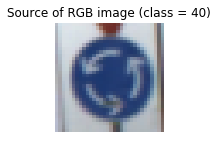

Generating of RGB image (class = 40)

Show Class=[40],Name=[Roundabout mandatory] from data set,Show length is [30],Total length is [30]


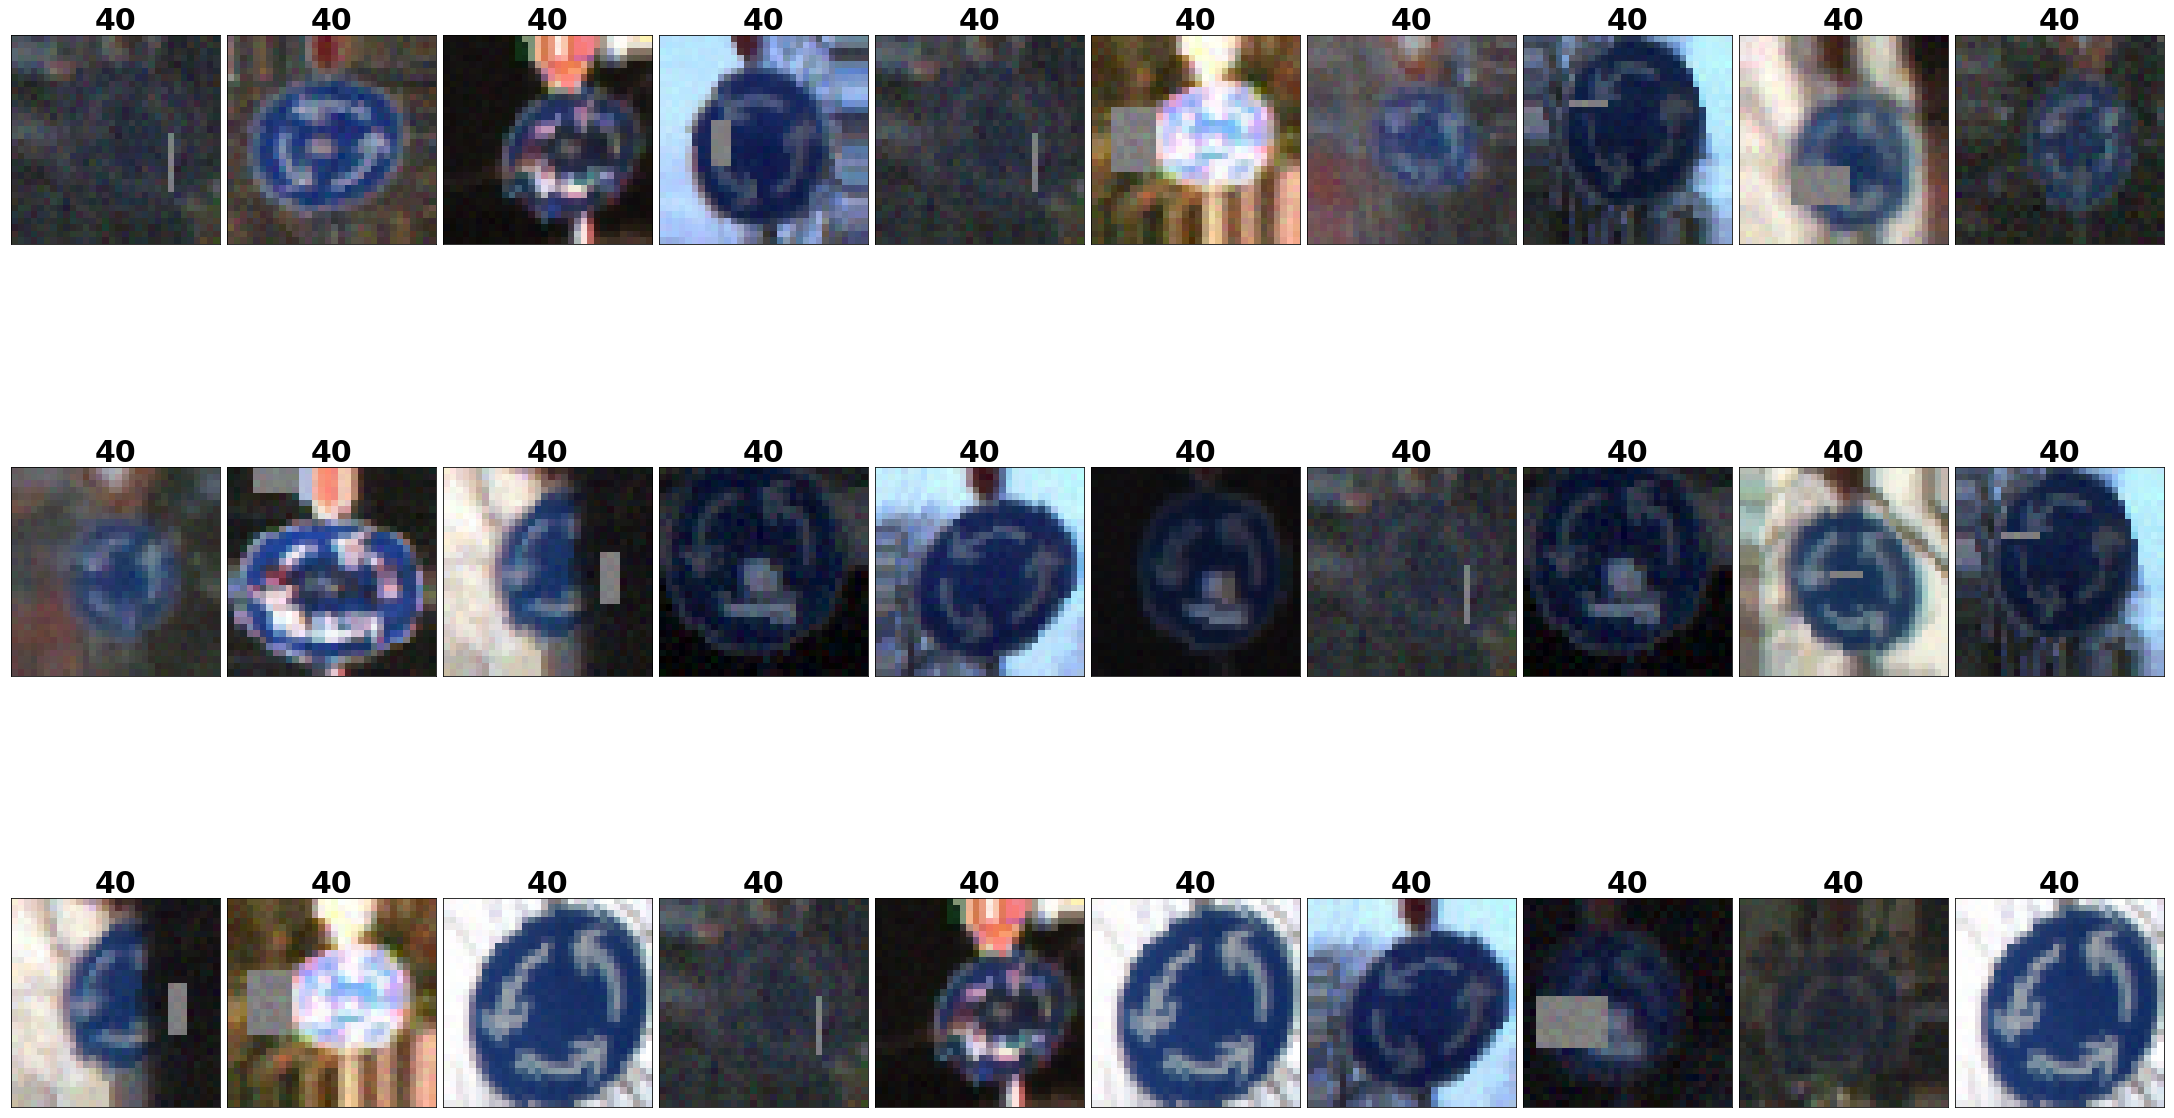

In [34]:
gen_class_images_show(X_train,y_train,40)

#### Image Data Generator function definition

In [36]:
def gen_class_images(images,lables,sumclass):
    """"
    Generate specified one class image
    
    """
    for class_n in range(0,sumclass):
        print("Class ",class_n, ': ', end='')
        imagemarkimg = images[lables == class_n]
        labelmarkimg = lables[lables == class_n] 
        n_samples = len(imagemarkimg)
        print(n_samples,end='')
        
        n_min_samples = 8000
        batch_counter = (n_min_samples-n_samples)
        batch_size = 128
        
        while( batch_counter >= 0):
            for x_batch, y_batch in image_datagen.flow(imagemarkimg, labelmarkimg,batch_size):
                images = np.concatenate((images, x_batch), axis=0)
                lables = np.concatenate((lables, y_batch), axis=0)
                
                if batch_counter < 0:
                    break
                    
                batch_counter -= batch_size
            
            n_samples = len(images[lables == class_n])
            batch_counter = (n_min_samples-n_samples)
        
        print(' Generating samples numbers = {}'.format(n_samples))
        
    return images,lables

In [ ]:
def defined_gen_class_images(images,lables,sumclass):
    """"
    Generate specified one class image
    
    """
    for class_n in range(0,sumclass):
        print(class_n, ': ', end='')
        imagemarkimg = images[lables == class_n]
        labelmarkimg = lables[lables == class_n] 
        n_samples = len(imagemarkimg)
        print(n_samples)
        batch_counter = 0
        
        n_min_samples = 1000
    
        if n_samples < n_min_samples:
            
            for i in range(n_min_samples-n_samples):
                    showimage = imagemarkimg[np.random.randint(n_samples)]
                    img = showimage
#                     HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#                     HSV[:,:,2] = (1.5 * np.random.random_sample(1) + 0.5)*(HSV[:,:,2])
#                     img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )
                    ret_array = []
                    ret_array.append(img)
                    img = np.array(ret_array)
                    
                    ret_array1 = []
                    ret_array1.append(class_n)
                    ll = np.array(ret_array1)
                    
                    images = np.concatenate((images, img), axis=0)
                    lables = np.concatenate((lables, ll), axis=0)
        
    return images,lables

#### Image Data Generating

In [37]:
X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

Class  0 : 210 Generating samples numbers = 8190
Class  1 : 2220 Generating samples numbers = 8068
Class  2 : 2250 Generating samples numbers = 8030
Class  3 : 1410 Generating samples numbers = 8202
Class  4 : 1980 Generating samples numbers = 8048
Class  5 : 1860 Generating samples numbers = 8208
Class  6 : 420 Generating samples numbers = 8072
Class  7 : 1440 Generating samples numbers = 8224
Class  8 : 1410 Generating samples numbers = 8202
Class  9 : 1470 Generating samples numbers = 8246
Class  10 : 2010 Generating samples numbers = 8040
Class  11 : 1320 Generating samples numbers = 8136
Class  12 : 2100 Generating samples numbers = 8092
Class  13 : 2160 Generating samples numbers = 8144
Class  14 : 780 Generating samples numbers = 8056
Class  15 : 630 Generating samples numbers = 8072
Class  16 : 420 Generating samples numbers = 8072
Class  17 : 1110 Generating samples numbers = 8154
Class  18 : 1200 Generating samples numbers = 8224
Class  19 : 210 Generating samples numbers = 8

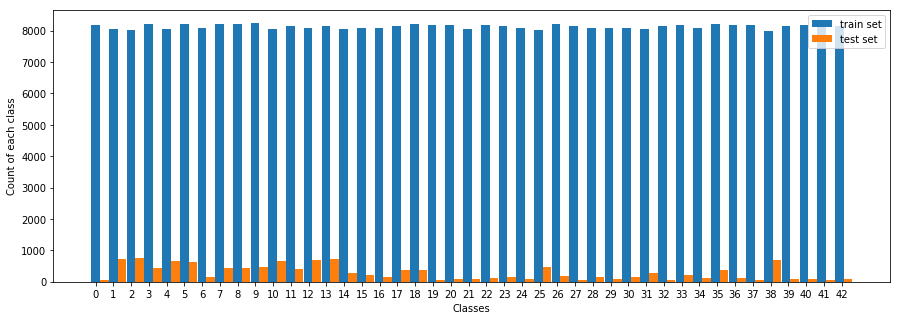

In [38]:
X_train,y_train = gen_class_images(X_train,y_train,n_classes)
show_all_class_histogram(y_train,y_test,n_classes)

In [41]:
train_dataset_file = "traffic-signs-data/gen_train.p"

print("Number of training examples after augmenting and balancing training data =", X_train.shape[0])
pickle.dump({
        "features" : X_train,
        "labels" : y_train
    }, open(train_dataset_file, "wb" ),protocol=4)
print("Generated balanced dataset saved in", train_dataset_file)

Number of training examples after augmenting and balancing training data = 349632
Generated balanced dataset saved in traffic-signs-data/gen_train.p


In [42]:
train_dataset_file = "traffic-signs-data/gen_train.p"

with open(train_dataset_file, mode='rb') as f:
    gen_train = pickle.load(f)
    
X_train, y_train = gen_train['features'], gen_train['labels']
print("Number of training examples after augmenting and balancing training data =", X_train.shape[0])

Number of training examples after augmenting and balancing training data = 349632


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [44]:
def normalizeyImage(img):
    # Histogram normalization in y
#     YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YUV )
#     YCrCb[:,:,0] = cv2.equalizeHist(YCrCb[:,:,0])
#     YCrCb[:,:,1] = cv2.equalizeHist(YCrCb[:,:,1])
#     YCrCb[:,:,2] = cv2.equalizeHist(YCrCb[:,:,2])
#     img = cv2.cvtColor(YCrCb, cv2.COLOR_YUV2RGB )

#     YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
# #     YCrCb[:,:,0] = cv2.equalizeHist(YCrCb[:,:,0])
#     YCrCb[:,:,0] = gamma_correction((YCrCb[:,:,0]),0.2)
#     img = cv2.cvtColor(YCrCb, cv2.COLOR_YUV2RGB )

#     HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# #     HSV[:,:,2] = cv2.equalizeHist(HSV[:,:,2])
# #     HSV[:,:,2] = exposure.equalize_adapthist(HSV[:,:,2], clip_limit=0.01)    
#     HSV[:,:,2] = gamma_correction((HSV[:,:,2]),1.4)
#     img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )
    
#     
#     return cv2.cvtColor(img, cv2.COLOR_YCrCb2GRAY)
#     return np.resize(cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)),(32,32,1))
    img = img/255.0
    
    return (img)
    
    
#     return np.resize(gray ,(32,32,1))
#     return np.resize(YCrCb[:,:,0] ,(32,32,1))

def preprocessImages(images):
    ret_array = []
    for img in images:
        ret_array.append(normalizeyImage((img)))
    return np.array(ret_array)

X_train = preprocessImages(X_train)
X_valid = preprocessImages(X_valid)
X_test = preprocessImages(X_test)

In [45]:
print(X_train[0])
# show_class_images(X_train1,y_train,n_classes)

[[[ 0.62352943  0.51372552  0.43137255]
  [ 0.66666669  0.53333336  0.3882353 ]
  [ 0.64313728  0.50980395  0.39607844]
  ..., 
  [ 0.627451    0.49411765  0.36862746]
  [ 0.63921571  0.47058824  0.34117648]
  [ 0.64705884  0.48627451  0.38039216]]

 [[ 0.64313728  0.52156866  0.41568628]
  [ 0.65882355  0.52549022  0.3882353 ]
  [ 0.63137257  0.49803922  0.41960785]
  ..., 
  [ 0.60784316  0.45490196  0.36470589]
  [ 0.58823532  0.48627451  0.35294119]
  [ 0.61960787  0.4509804   0.38039216]]

 [[ 0.66666669  0.50980395  0.42352942]
  [ 0.64705884  0.52549022  0.41568628]
  [ 0.64705884  0.50588238  0.39215687]
  ..., 
  [ 0.61960787  0.50588238  0.3764706 ]
  [ 0.63137257  0.43921569  0.3764706 ]
  [ 0.66274512  0.60392159  0.59215689]]

 ..., 
 [[ 0.47058824  0.39607844  0.34509805]
  [ 0.41568628  0.38039216  0.28235295]
  [ 0.43137255  0.3764706   0.32941177]
  ..., 
  [ 0.14901961  0.1882353   0.19215687]
  [ 0.19215687  0.19215687  0.17254902]
  [ 0.1882353   0.17254902  0.18431

### Model Architecture

In [46]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten


def LeNet2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    keep_prob = tf.placeholder(tf.float32)
    phase = tf.placeholder(tf.bool)
    
#     x = tf.contrib.layers.batch_norm(x, center=True, scale=True, is_training=phase)

    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc01 = flatten(conv1)
    fc02 = flatten(conv2)
#     fc0   = flatten(conv2)
   
    fc0 = tf.concat([fc01, fc02],1)
    
#     fc0 = tf.concat([flatten(drop1), flatten(drop2)],1 )
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1176+400, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1) 
    
#     fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    logits = fc2
#     fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b    
    # SOLUTION: Activation.
#     fc2    = tf.nn.relu(fc2)
    
# #     fc2 = tf.nn.dropout(fc2, keep_prob)

#     # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
#     fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
#     fc3_b  = tf.Variable(tf.zeros(43))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b
# #     logits = tf.matmul(fc2_drop, fc3_W) + fc3_b

    return logits,keep_prob,phase

def LeNet1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    keep_prob1 = tf.placeholder(tf.float32)
    keep_prob2 = tf.placeholder(tf.float32)
    keep_prob3 = tf.placeholder(tf.float32)
    phase = tf.placeholder(tf.bool)
    
#     x = tf.contrib.layers.batch_norm(x, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
#     conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    conv1 = tf.nn.dropout(conv1, keep_prob1)
    
#     conv1 = tf.contrib.layers.batch_norm(conv1, center=True, scale=True, is_training=phase)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv2 = tf.nn.dropout(conv2, keep_prob1)
    
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#     conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv3 = tf.nn.dropout(conv3, keep_prob1)
    
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv4 = tf.nn.dropout(conv4, keep_prob1)
    
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#     conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv5 = tf.nn.dropout(conv5, keep_prob2)
    
    conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    
    # SOLUTION: Activation.
    conv6 = tf.nn.relu(conv6)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv6 = tf.nn.dropout(conv6, keep_prob2)
    
    
    fc0   = flatten(conv6)


    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(2048))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob3)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(2048))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob3)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(2048, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
#     logits = fc2

#     regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)
    regularizers = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)   
#     regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) +\
#         tf.nn.l2_loss(conv4_W) + tf.nn.l2_loss(conv5_W) + tf.nn.l2_loss(conv6_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)+tf.nn.l2_loss(fc3_W)

    return logits,keep_prob1,keep_prob2,keep_prob3,phase,regularizers


def LeNetorigin(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    keep_prob1 = tf.placeholder(tf.float32)
    keep_prob2 = tf.placeholder(tf.float32)
    phase = tf.placeholder(tf.bool)
    
#     x = tf.contrib.layers.batch_norm(x, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6*4), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6*4))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv1 = tf.nn.dropout(conv1, keep_prob2)
    
#     conv1 = tf.contrib.layers.batch_norm(conv1, center=True, scale=True, is_training=phase)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6*4, 16*3), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16*3))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv2 = tf.nn.dropout(conv2, keep_prob2)
    
    
    
    
    fc0   = flatten(conv2)


    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
#     fc2 = tf.nn.dropout(fc2, keep_prob2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
#     logits = fc2

    regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)
#     regularizers = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)   
#     regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)

    return logits,keep_prob1,keep_prob2,phase,regularizers

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits,keep_prob1,keep_prob2,keep_prob3,phase,loss_regularizers = LeNet1(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# 0.0001
loss_operation = tf.reduce_mean(cross_entropy+ 0.001*loss_regularizers)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 1.0,keep_prob2: 1.0,keep_prob3: 1.0,phase: 0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [47]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

start_log = EPOCHS*0.3

# Iteration-number for last improvement to validation accuracy.
last_improvement = start_log

# Stop optimization if no improvement found in this many iterations.
require_improvement = 15

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 0.9,keep_prob2: 0.9,keep_prob3:0.5,phase: 1})

        test_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1),end=' ')
        print("test Accuracy = {:.4f}".format(test_accuracy),end=' ')
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        
        # If validation accuracy is an improvement over best-known.
        if i > start_log and validation_accuracy > best_validation_accuracy:
            # Update the best-known validation accuracy.
            best_validation_accuracy = validation_accuracy
                
            # Set the iteration for the last improvement to current.
            last_improvement = i

            # Save all variables of the TensorFlow graph to file.
            saver.save(sess, './lenet')
                
        # If no improvement found in the required number of iterations.
        if i - last_improvement > require_improvement:
            print("No improvement found in a loop, stopping optimization.")
                
            # Break out from the for-loop.
            break
        
#     saver.save(sess, './lenet')
#     print("Model saved")

# Print result.
print("best Accuracy = {:.4f} Model saved".format(best_validation_accuracy))

Training...

EPOCH 1 ... test Accuracy = 0.9140 Validation Accuracy = 0.9107
EPOCH 2 ... test Accuracy = 0.9665 Validation Accuracy = 0.9641
EPOCH 3 ... test Accuracy = 0.9758 Validation Accuracy = 0.9736
EPOCH 4 ... test Accuracy = 0.9819 Validation Accuracy = 0.9790
EPOCH 5 ... test Accuracy = 0.9849 Validation Accuracy = 0.9822
EPOCH 6 ... test Accuracy = 0.9897 Validation Accuracy = 0.9873
EPOCH 7 ... test Accuracy = 0.9887 Validation Accuracy = 0.9866
EPOCH 8 ... test Accuracy = 0.9899 Validation Accuracy = 0.9871
EPOCH 9 ... test Accuracy = 0.9912 Validation Accuracy = 0.9877
EPOCH 10 ... test Accuracy = 0.9907 Validation Accuracy = 0.9872
EPOCH 11 ... test Accuracy = 0.9929 Validation Accuracy = 0.9900
EPOCH 12 ... test Accuracy = 0.9921 Validation Accuracy = 0.9889
EPOCH 13 ... test Accuracy = 0.9932 Validation Accuracy = 0.9898
EPOCH 14 ... test Accuracy = 0.9925 Validation Accuracy = 0.9890
EPOCH 15 ... test Accuracy = 0.9929 Validation Accuracy = 0.9890
EPOCH 16 ... test Acc

KeyboardInterrupt: 

In [52]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.9893


In [51]:
rate = 0.0001
# rate = 0.0001

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


best_validation_accuracy = 0.0

start_log = 0

# Iteration-number for last improvement to validation accuracy.
last_improvement = start_log

# Stop optimization if no improvement found in this many iterations.
require_improvement = 15

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 1.0,keep_prob2: 0.9,keep_prob3:0.6,phase: 1})

        test_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1),end=' ')
        print("test Accuracy = {:.4f}".format(test_accuracy),end=' ')
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        
        # If validation accuracy is an improvement over best-known.
        if i > start_log and validation_accuracy > best_validation_accuracy:
            # Update the best-known validation accuracy.
            best_validation_accuracy = validation_accuracy
                
            # Set the iteration for the last improvement to current.
            last_improvement = i

            # Save all variables of the TensorFlow graph to file.
            saver.save(sess, './lenet')
                
        # If no improvement found in the required number of iterations.
        if i - last_improvement > require_improvement:
            print("No improvement found in a loop, stopping optimization.")
                
            # Break out from the for-loop.
            break
        
#     saver.save(sess, './lenet')
#     print("Model saved")

# Print result.
print("best Accuracy = {:.4f} Model saved".format(best_validation_accuracy))        

INFO:tensorflow:Restoring parameters from ./lenet
Training...

EPOCH 1 ... test Accuracy = 0.9994 Validation Accuracy = 0.9948
EPOCH 2 ... test Accuracy = 0.9997 Validation Accuracy = 0.9949
EPOCH 3 ... test Accuracy = 0.9997 Validation Accuracy = 0.9952
EPOCH 4 ... test Accuracy = 0.9997 Validation Accuracy = 0.9949


KeyboardInterrupt: 

### Analyze Model

In [ ]:
y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

def predictlable(X_data, y_data):
    num_examples = len(y_data)
    total_accuracy = 0
    ret_array = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        lable = sess.run(y_pred_cls, feed_dict={x: batch_x, y: batch_y,keep_prob1: 1.0,keep_prob2: 1.0, phase: 0})
        ret_array.extend(lable)
    return np.array(ret_array)

lables = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    lables = predictlable(X_test, y_test)
#     lables = predictlable(X_valid, y_valid)


In [ ]:
def show_all_class_images(images,lables,cmap=None):
    cols = 15
    sumclass = len(images)
    rows = (sumclass+cols-1)//cols 
#     print("Random show each class from data set:")
    
    plt.figure(figsize=(30, 20))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        showimage = images[i]
         # use gray scale color map if there is only one channel   
        showimage_shape = showimage.shape
        
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(lables[i],fontsize=30,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

In [ ]:
print("incorrectly_predicted:")
incorrectly_predictedx = X_test[y_test != lables]
incorrectly_predictedy = y_test[y_test != lables]
# incorrectly_predictedx = X_valid[y_valid != lables]
# incorrectly_predictedy = y_valid[y_valid != lables]

show_all_class_images(incorrectly_predictedx,incorrectly_predictedy)

In [ ]:
# show_one_class_images(X_valid,y_valid,18)
show_one_class_images(X_train,y_train,21)
# show_one_class_images(incorrectly_predictedx,incorrectly_predictedy,21)

In [ ]:
# histogram of label frequency
# show each class
coun_single_images(incorrectly_predictedy,n_classes)


In [ ]:
from PIL import Image
plt.imshow(incorrectly_predictedx[0])
# imgplot = plt.imshow(incorrectly_predictedx[0], interpolation="bicubic")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


import glob
from skimage import transform,data

def show_images(images, cmap=None):
    cols = 5
    rows = (len(images)+2)//cols 
    
    plt.figure(figsize=(8, 8))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()


# print(signnames)
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]

show_images(test_images)


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#Visualize new raw images

def test_net(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data,keep_prob1: 1.0,keep_prob2: 1.0, phase: 0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    signs_top_5=test_net(test_images,sess)

plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 3, 3*i+1)
    plt.imshow(test_images[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 3, 3*i+3)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signnames[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")